### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



Total de venta de Productos tienda 1: $1,150,880,400.00
Total de venta de Productos tienda 2: $1,116,343,500.00
Total de venta de Productos tienda 3: $1,098,019,600.00
Total de venta de Productos tienda 4: $1,038,375,700.00


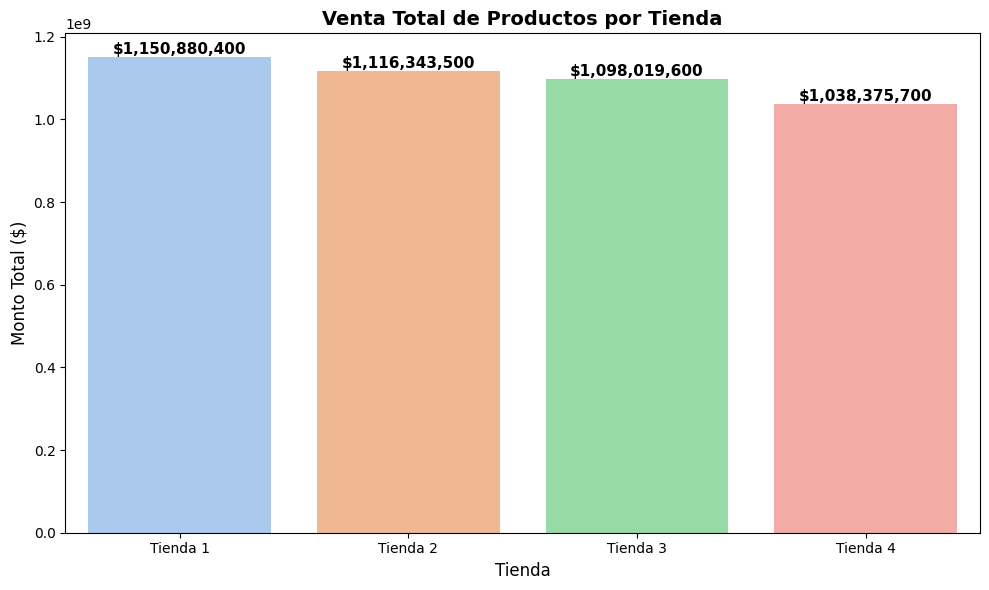

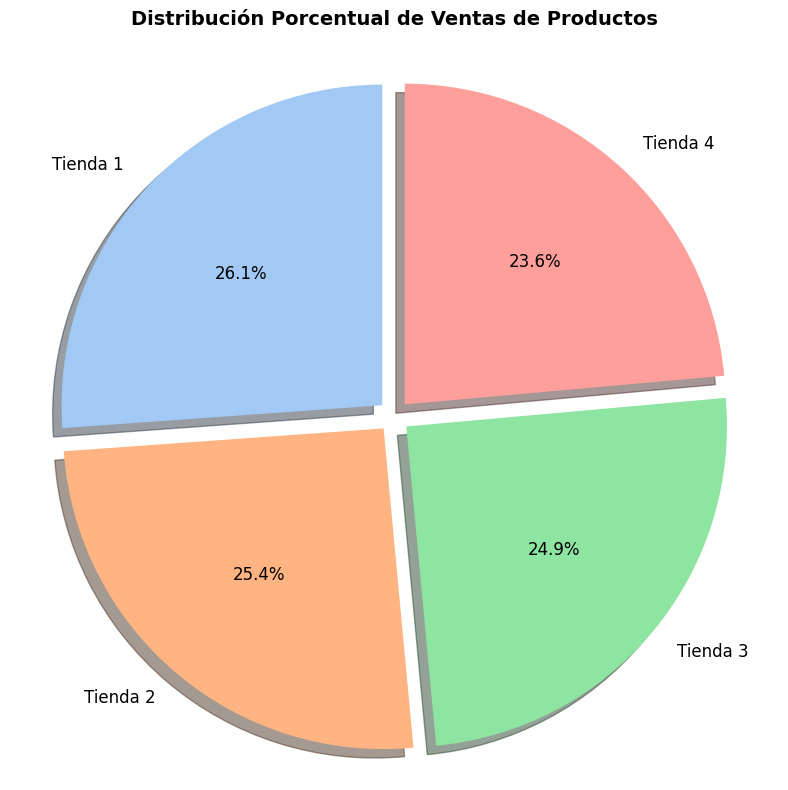


Análisis de ventas de productos:
La tienda con mayor venta de productos es Tienda 1 con $1,150,880,400.00
La tienda con menor venta de productos es Tienda 4 con $1,038,375,700.00
La diferencia entre la mayor y menor venta es $112,504,700.00


In [4]:
tienda["total_productos"] = tienda["Precio"]
tienda2["total_productos"] = tienda2["Precio"]
tienda3["total_productos"] = tienda3["Precio"]
tienda4["total_productos"] = tienda4["Precio"]

# Calcular la suma total de productos vendidos por tienda
total_productos1 = tienda["total_productos"].sum()
total_productos2 = tienda2["total_productos"].sum()
total_productos3 = tienda3["total_productos"].sum()
total_productos4 = tienda4["total_productos"].sum()

print(f"Total de venta de Productos tienda 1: ${total_productos1:,.2f}")
print(f"Total de venta de Productos tienda 2: ${total_productos2:,.2f}")
print(f"Total de venta de Productos tienda 3: ${total_productos3:,.2f}")
print(f"Total de venta de Productos tienda 4: ${total_productos4:,.2f}")

# Crear un DataFrame para la visualización
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración visual para gráficos
plt.style.use("seaborn-v0_8-pastel")
sns.set_palette("pastel")

ventas_productos = pd.DataFrame(
    {
        "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
        "Venta Total": [
            total_productos1,
            total_productos2,
            total_productos3,
            total_productos4,
        ],
    }
)

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x="Tienda", y="Venta Total", data=ventas_productos, hue="Tienda", legend=False
)
plt.title("Venta Total de Productos por Tienda", fontsize=14, fontweight="bold")
plt.xlabel("Tienda", fontsize=12)
plt.ylabel("Monto Total ($)", fontsize=12)

# Añadir etiquetas de valores en las barras
for i, p in enumerate(ax.patches):
    ax.annotate(
        f'${ventas_productos["Venta Total"][i]:,.0f}',
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=11,
        fontweight="bold",
    )

plt.tight_layout()
plt.show()

# Análisis de la distribución porcentual de ventas por tienda
total_ventas_productos = (
    total_productos1 + total_productos2 + total_productos3 + total_productos4
)
porcentajes = [
    total_productos1 / total_ventas_productos * 100,
    total_productos2 / total_ventas_productos * 100,
    total_productos3 / total_ventas_productos * 100,
    total_productos4 / total_ventas_productos * 100,
]

# Gráfico de pastel para mostrar la participación porcentual
plt.figure(figsize=(8, 8))
plt.pie(
    porcentajes,
    labels=["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    autopct="%1.1f%%",
    startangle=90,
    explode=[0.05, 0.05, 0.05, 0.05],
    shadow=True,
    textprops={"fontsize": 12},
)
plt.title(
    "Distribución Porcentual de Ventas de Productos",
    fontsize=14,
    fontweight="bold",
    pad=20,
)
plt.axis("equal")
plt.tight_layout()
plt.show()

# Análisis e interpretación
print("\nAnálisis de ventas de productos:\n" + "=" * 30)
tienda_mayor_venta = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"][
    np.argmax([total_productos1, total_productos2, total_productos3, total_productos4])
]
tienda_menor_venta = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"][
    np.argmin([total_productos1, total_productos2, total_productos3, total_productos4])
]
venta_mayor = max(
    total_productos1, total_productos2, total_productos3, total_productos4
)
venta_menor = min(
    total_productos1, total_productos2, total_productos3, total_productos4
)

print(
    f"La tienda con mayor venta de productos es {tienda_mayor_venta} con ${venta_mayor:,.2f}"
)
print(
    f"La tienda con menor venta de productos es {tienda_menor_venta} con ${venta_menor:,.2f}"
)
print(
    f"La diferencia entre la mayor y menor venta es ${(venta_mayor - venta_menor):,.2f}"
)

Total de envío de Productos de tienda 1: $61,377,900.00
Total de envío de Productos de tienda 2: $59,485,100.00
Total de envío de Productos de tienda 3: $58,516,600.00
Total de envío de Productos de tienda 4: $55,317,400.00


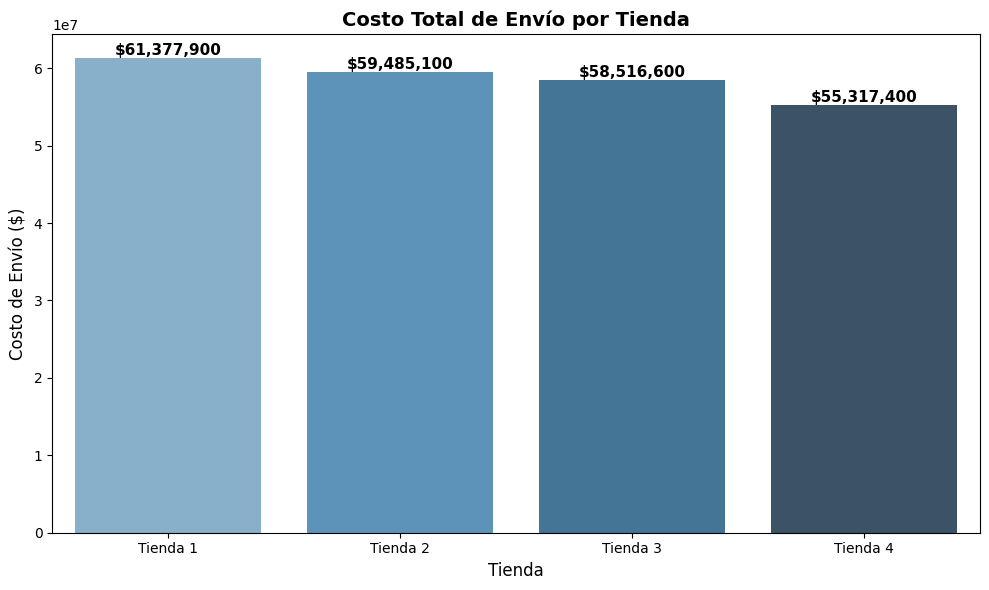

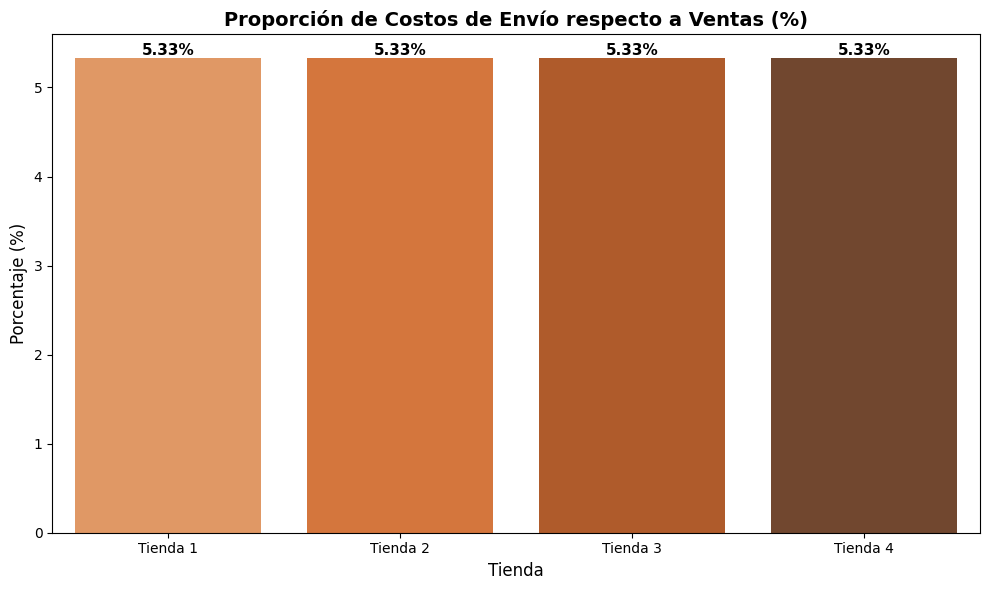


Análisis de costos de envío:
La tienda con mayor costo de envío es Tienda 1 con $61,377,900.00
La tienda con menor costo de envío es Tienda 4 con $55,317,400.00
La tienda con mayor proporción de costos de envío respecto a ventas es Tienda 1 con 5.33%
La tienda con menor proporción de costos de envío respecto a ventas es Tienda 1 con 5.33%


In [8]:
# Calculando los costos de envío para cada tienda
tienda["total_envio"] = tienda["Costo de envío"]
tienda2["total_envio"] = tienda2["Costo de envío"]
tienda3["total_envio"] = tienda3["Costo de envío"]
tienda4["total_envio"] = tienda4["Costo de envío"]

# Suma total de costos de envío por tienda
total_envio1 = tienda["total_envio"].sum()
total_envio2 = tienda2["total_envio"].sum()
total_envio3 = tienda3["total_envio"].sum()
total_envio4 = tienda4["total_envio"].sum()

print(f"Total de envío de Productos de tienda 1: ${total_envio1:,.2f}")
print(f"Total de envío de Productos de tienda 2: ${total_envio2:,.2f}")
print(f"Total de envío de Productos de tienda 3: ${total_envio3:,.2f}")
print(f"Total de envío de Productos de tienda 4: ${total_envio4:,.2f}")

# Crear un DataFrame para la visualización
envios = pd.DataFrame(
    {
        "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
        "Costo Total de Envío": [
            total_envio1,
            total_envio2,
            total_envio3,
            total_envio4,
        ],
    }
)

# Gráfico de barras para costos de envío
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x="Tienda",
    y="Costo Total de Envío",
    data=envios,
    hue="Tienda",
    palette="Blues_d",
    legend=False,
)
plt.title("Costo Total de Envío por Tienda", fontsize=14, fontweight="bold")
plt.xlabel("Tienda", fontsize=12)
plt.ylabel("Costo de Envío ($)", fontsize=12)

# Añadir etiquetas de valores en las barras
for i, p in enumerate(ax.patches):
    ax.annotate(
        f'${envios["Costo Total de Envío"][i]:,.0f}',
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=11,
        fontweight="bold",
    )

plt.tight_layout()
plt.show()

# Calculando la proporción de costos de envío respecto al precio de productos
envios["Venta de Productos"] = [
    total_productos1,
    total_productos2,
    total_productos3,
    total_productos4,
]
envios["Proporción Envío/Venta"] = (
    envios["Costo Total de Envío"] / envios["Venta de Productos"] * 100
).round(2)

# Gráfico de barras para mostrar la proporción envío/venta
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x="Tienda",
    y="Proporción Envío/Venta",
    data=envios,
    hue="Tienda",
    palette="Oranges_d",
    legend=False,
)
plt.title(
    "Proporción de Costos de Envío respecto a Ventas (%)",
    fontsize=14,
    fontweight="bold",
)
plt.xlabel("Tienda", fontsize=12)
plt.ylabel("Porcentaje (%)", fontsize=12)

# Añadir etiquetas de valores en las barras
for i, p in enumerate(ax.patches):
    ax.annotate(
        f'{envios["Proporción Envío/Venta"][i]:.2f}%',
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=11,
        fontweight="bold",
    )

plt.tight_layout()
plt.show()

# Análisis e interpretación
print("\nAnálisis de costos de envío:\n" + "=" * 30)
tienda_mayor_envio = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"][
    np.argmax([total_envio1, total_envio2, total_envio3, total_envio4])
]
tienda_menor_envio = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"][
    np.argmin([total_envio1, total_envio2, total_envio3, total_envio4])
]
tienda_mayor_prop = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"][
    np.argmax(envios["Proporción Envío/Venta"])
]
tienda_menor_prop = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"][
    np.argmin(envios["Proporción Envío/Venta"])
]

print(
    f"La tienda con mayor costo de envío es {tienda_mayor_envio} con ${max(total_envio1, total_envio2, total_envio3, total_envio4):,.2f}"
)
print(
    f"La tienda con menor costo de envío es {tienda_menor_envio} con ${min(total_envio1, total_envio2, total_envio3, total_envio4):,.2f}"
)
print(
    f"La tienda con mayor proporción de costos de envío respecto a ventas es {tienda_mayor_prop} con {max(envios['Proporción Envío/Venta']):.2f}%"
)
print(
    f"La tienda con menor proporción de costos de envío respecto a ventas es {tienda_menor_prop} con {min(envios['Proporción Envío/Venta']):.2f}%"
)

Total facturación tienda 1: $1,212,258,300.00
Total facturación tienda 2: $1,175,828,600.00
Total facturación tienda 3: $1,156,536,200.00
Total facturación tienda 4: $1,093,693,100.00
Total facturación global: $4,638,316,200.00


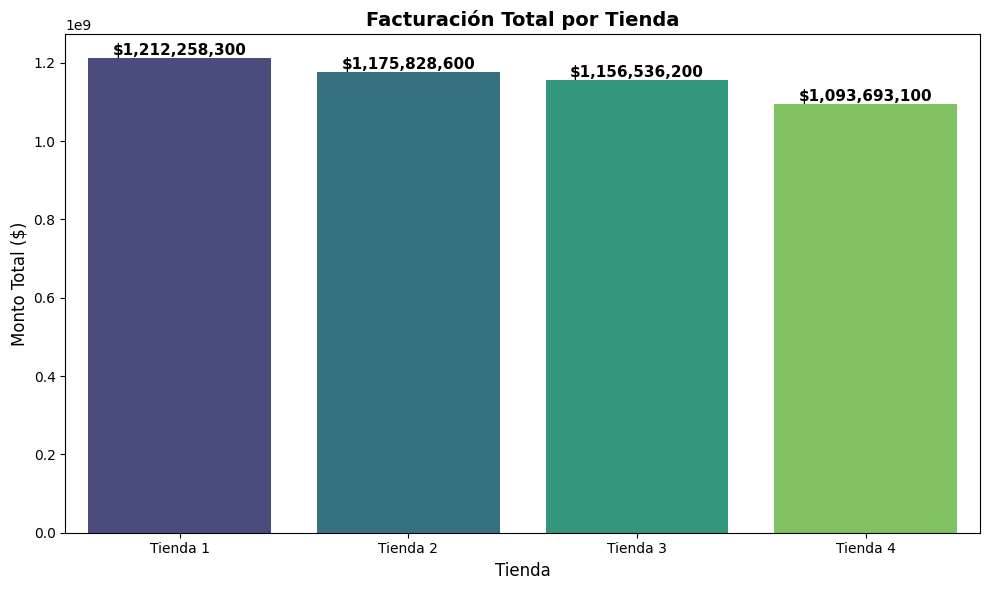

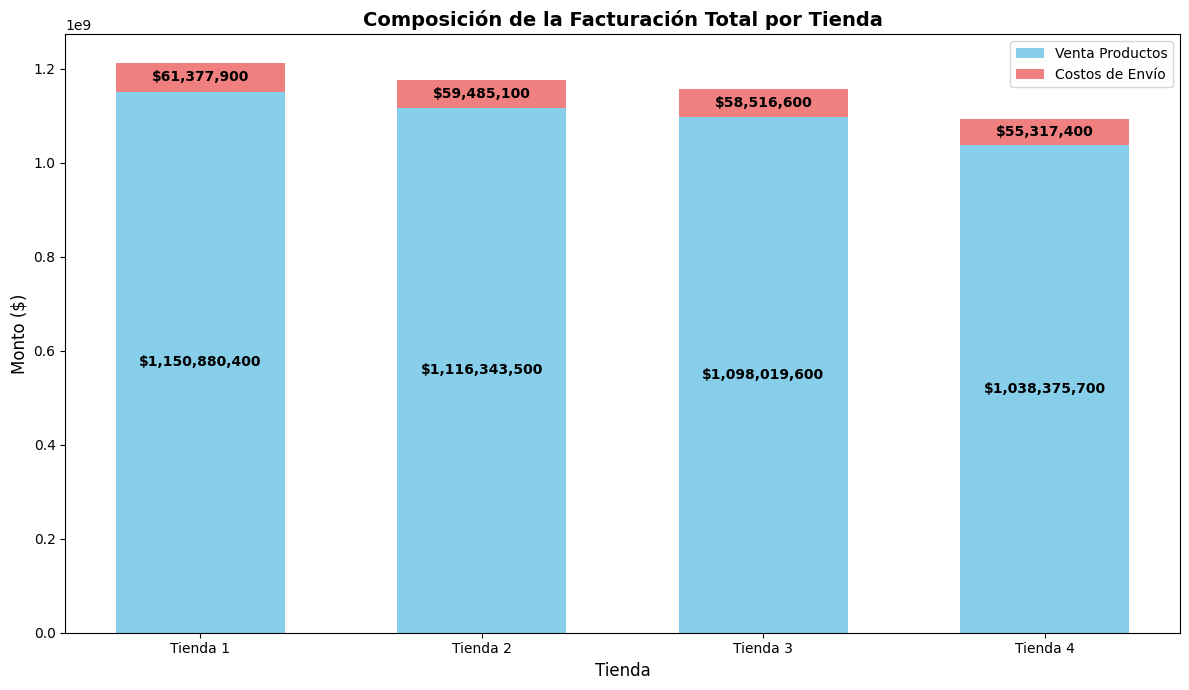

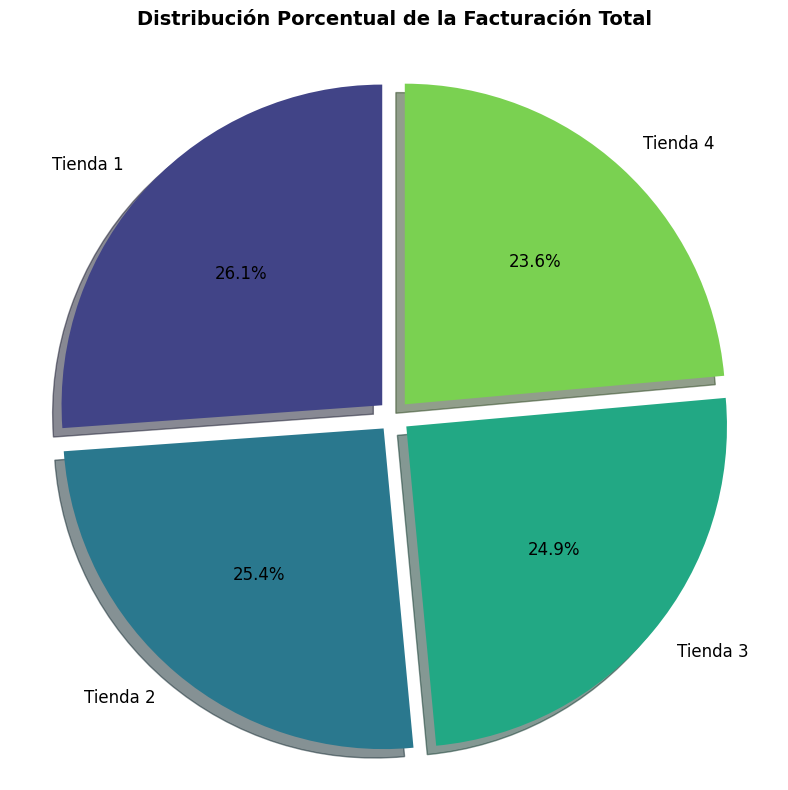


Análisis de facturación total:
La tienda con mayor facturación total es Tienda 1 con $1,212,258,300.00 (26.1% del total)
La tienda con menor facturación total es Tienda 4 con $1,093,693,100.00 (23.6% del total)
La diferencia entre la mayor y menor facturación es $118,565,200.00
La facturación promedio por tienda es $1,159,579,050.00


In [9]:
# Calculate the total for each dataframe by summing 'Precio' and 'Costo de envío'
tienda["total"] = tienda["Precio"] + tienda["Costo de envío"]
tienda2["total"] = tienda2["Precio"] + tienda2["Costo de envío"]
tienda3["total"] = tienda3["Precio"] + tienda3["Costo de envío"]
tienda4["total"] = tienda4["Precio"] + tienda4["Costo de envío"]

# Compute the total sum for each dataframe
total1 = tienda["total"].sum()
total2 = tienda2["total"].sum()
total3 = tienda3["total"].sum()
total4 = tienda4["total"].sum()

print(f"Total facturación tienda 1: ${total1:,.2f}")
print(f"Total facturación tienda 2: ${total2:,.2f}")
print(f"Total facturación tienda 3: ${total3:,.2f}")
print(f"Total facturación tienda 4: ${total4:,.2f}")
print(f"Total facturación global: ${(total1 + total2 + total3 + total4):,.2f}")

# Crear un DataFrame para la visualización
facturacion_total = pd.DataFrame(
    {
        "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
        "Facturación Total": [total1, total2, total3, total4],
        "Venta Productos": [
            total_productos1,
            total_productos2,
            total_productos3,
            total_productos4,
        ],
        "Costos de Envío": [total_envio1, total_envio2, total_envio3, total_envio4],
    }
)

# Gráfico de barras para facturación total
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x="Tienda",
    y="Facturación Total",
    data=facturacion_total,
    hue="Tienda",
    palette="viridis",
    legend=False,
)
plt.title("Facturación Total por Tienda", fontsize=14, fontweight="bold")
plt.xlabel("Tienda", fontsize=12)
plt.ylabel("Monto Total ($)", fontsize=12)

# Añadir etiquetas de valores en las barras
for i, p in enumerate(ax.patches):
    ax.annotate(
        f'${facturacion_total["Facturación Total"][i]:,.0f}',
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=11,
        fontweight="bold",
    )

plt.tight_layout()
plt.show()

# Gráfico de barras apiladas para mostrar la composición de la facturación
plt.figure(figsize=(12, 7))

# Preparar datos para barras apiladas
tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]
facturacion_productos = [
    total_productos1,
    total_productos2,
    total_productos3,
    total_productos4,
]
facturacion_envios = [total_envio1, total_envio2, total_envio3, total_envio4]

# Crear gráfico de barras apiladas
bar_width = 0.6
indices = np.arange(len(tiendas))

p1 = plt.bar(
    indices, facturacion_productos, bar_width, label="Venta Productos", color="skyblue"
)
p2 = plt.bar(
    indices,
    facturacion_envios,
    bar_width,
    bottom=facturacion_productos,
    label="Costos de Envío",
    color="lightcoral",
)

# Añadir etiquetas y título
plt.xlabel("Tienda", fontsize=12)
plt.ylabel("Monto ($)", fontsize=12)
plt.title(
    "Composición de la Facturación Total por Tienda", fontsize=14, fontweight="bold"
)
plt.xticks(indices, tiendas)
plt.legend(loc="upper right")

# Añadir etiquetas de valores dentro de las barras
for i, bar in enumerate(p1):
    height = bar.get_height()
    if height > 100000:  # Solo mostrar etiqueta si el valor es significativo
        plt.text(
            bar.get_x() + bar.get_width() / 2.0,
            height / 2,
            f"${facturacion_productos[i]:,.0f}",
            ha="center",
            va="center",
            color="black",
            fontsize=10,
            fontweight="bold",
        )

for i, bar in enumerate(p2):
    height = bar.get_height()
    bottom = bar.get_y()
    if height > 50000:  # Solo mostrar etiqueta si el valor es significativo
        plt.text(
            bar.get_x() + bar.get_width() / 2.0,
            bottom + height / 2,
            f"${facturacion_envios[i]:,.0f}",
            ha="center",
            va="center",
            color="black",
            fontsize=10,
            fontweight="bold",
        )

plt.tight_layout()
plt.show()

# Gráfico de pastel para mostrar la distribución de la facturación total
plt.figure(figsize=(8, 8))
plt.pie(
    [total1, total2, total3, total4],
    labels=["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    autopct="%1.1f%%",
    startangle=90,
    explode=[0.05, 0.05, 0.05, 0.05],
    shadow=True,
    colors=sns.color_palette("viridis", 4),
    textprops={"fontsize": 12},
)
plt.title(
    "Distribución Porcentual de la Facturación Total",
    fontsize=14,
    fontweight="bold",
    pad=20,
)
plt.axis("equal")
plt.tight_layout()
plt.show()

# Análisis e interpretación
print("\nAnálisis de facturación total:\n" + "=" * 30)
tienda_mayor_fact = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"][
    np.argmax([total1, total2, total3, total4])
]
tienda_menor_fact = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"][
    np.argmin([total1, total2, total3, total4])
]
fact_mayor = max(total1, total2, total3, total4)
fact_menor = min(total1, total2, total3, total4)
facturacion_global = total1 + total2 + total3 + total4

print(
    f"La tienda con mayor facturación total es {tienda_mayor_fact} con ${fact_mayor:,.2f} ({(fact_mayor/facturacion_global*100):.1f}% del total)"
)
print(
    f"La tienda con menor facturación total es {tienda_menor_fact} con ${fact_menor:,.2f} ({(fact_menor/facturacion_global*100):.1f}% del total)"
)
print(
    f"La diferencia entre la mayor y menor facturación es ${(fact_mayor - fact_menor):,.2f}"
)
print(f"La facturación promedio por tienda es ${(facturacion_global/4):,.2f}")

# 2. Ventas por categoría

TOP 3 CATEGORÍAS POR TIENDA

Tienda 1:
1. Electrónicos: $429,493,500.00
2. Electrodomésticos: $363,685,200.00
3. Muebles: $187,633,700.00
Estas 3 categorías representan el 85.22% de las ventas de la tienda

Tienda 2:
1. Electrónicos: $410,831,100.00
2. Electrodomésticos: $348,567,800.00
3. Muebles: $176,426,300.00
Estas 3 categorías representan el 83.83% de las ventas de la tienda

Tienda 3:
1. Electrónicos: $410,775,800.00
2. Electrodomésticos: $329,237,900.00
3. Muebles: $201,072,100.00
Estas 3 categorías representan el 85.71% de las ventas de la tienda

Tienda 4:
1. Electrónicos: $409,476,100.00
2. Electrodomésticos: $283,260,200.00
3. Muebles: $192,528,900.00
Estas 3 categorías representan el 85.25% de las ventas de la tienda


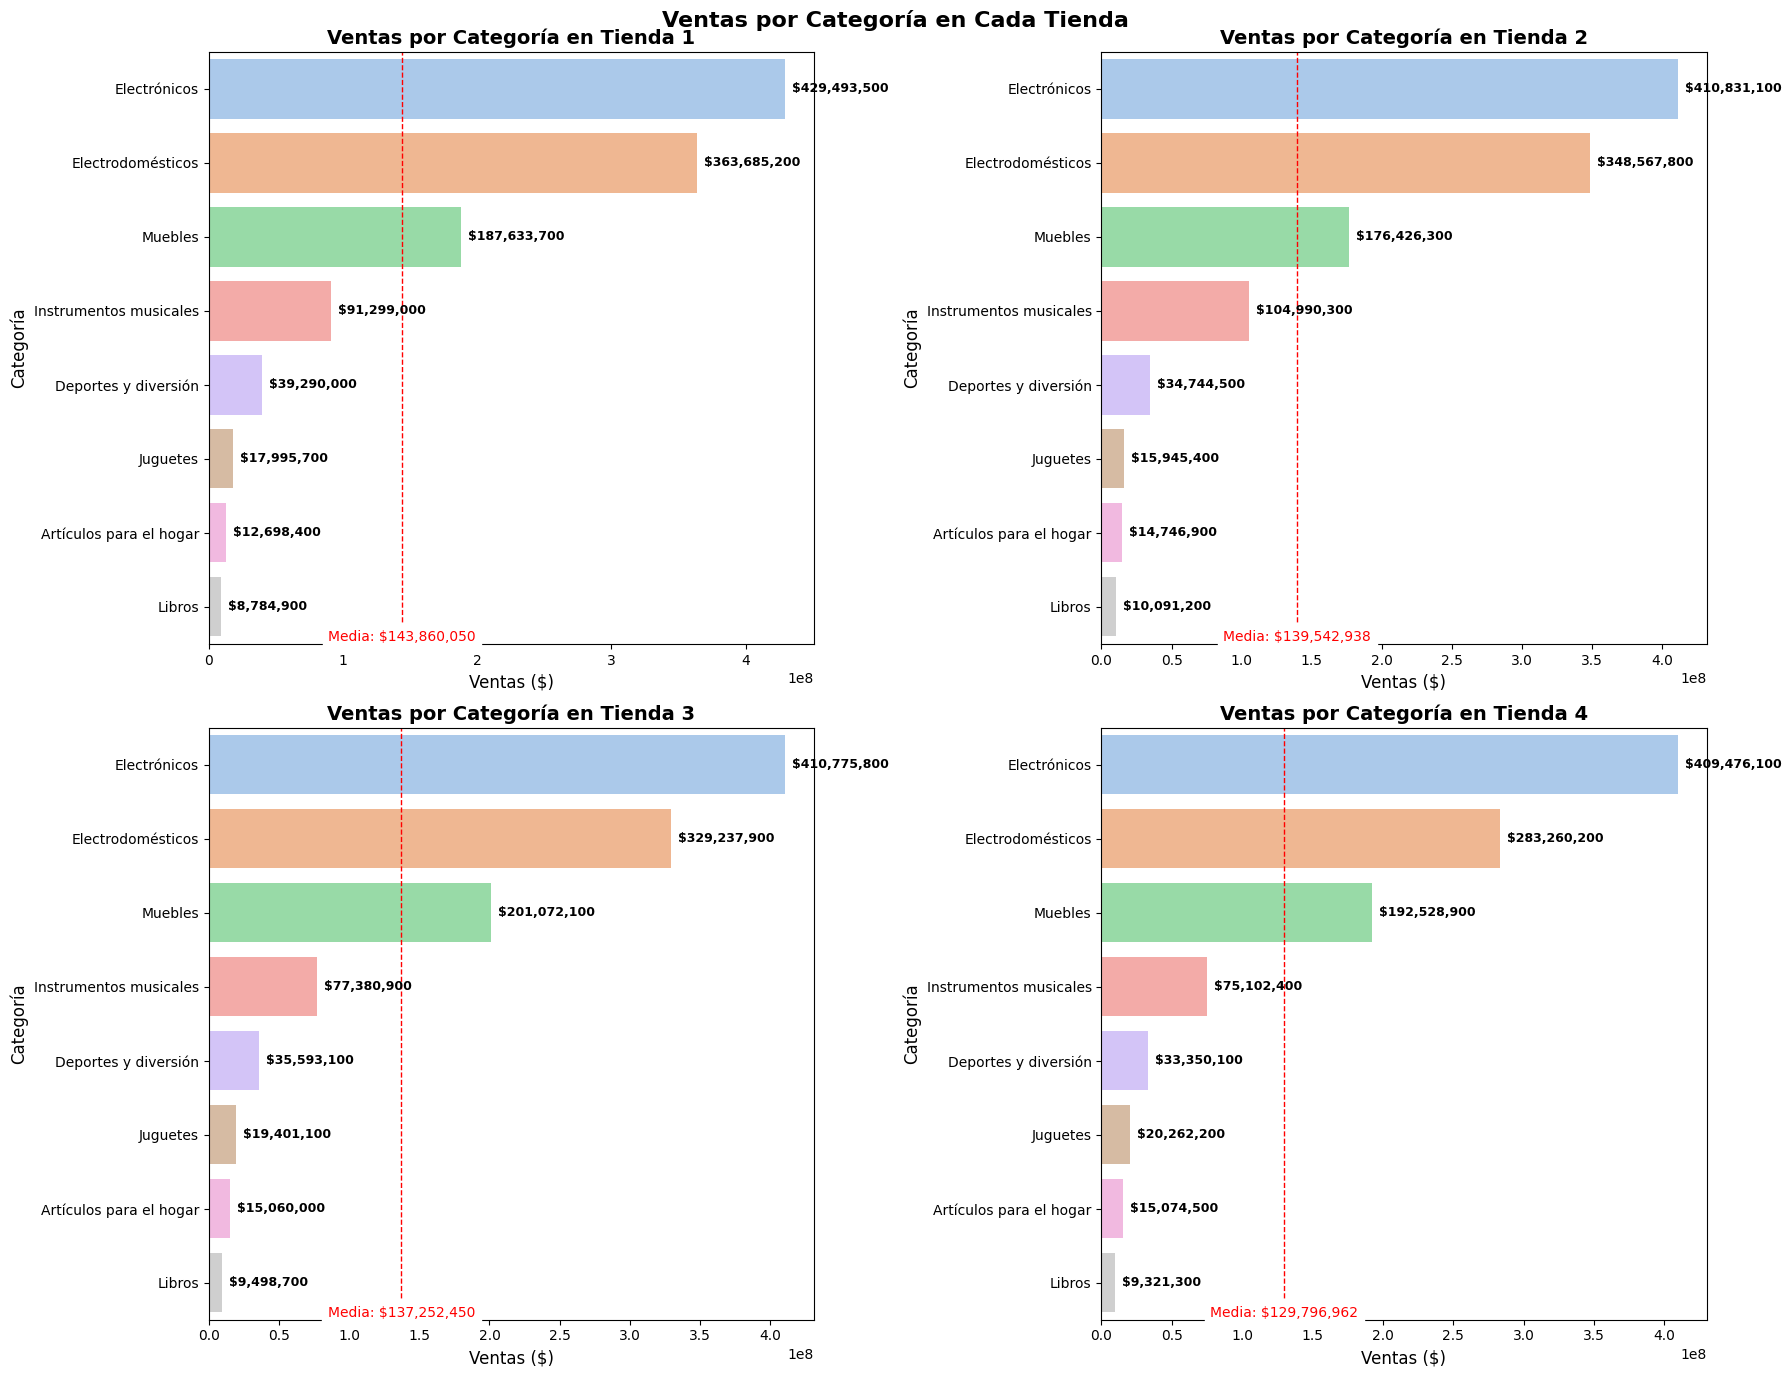

In [19]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Ventas por categoría para cada tienda
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración de estilo para gráficos
plt.style.use("seaborn-v0_8-pastel")
sns.set_palette("pastel")

# Agrupando las ventas por categoría para cada tienda
ventas_categoria_t1 = (
    tienda.groupby("Categoría del Producto")["Precio"]
    .sum()
    .sort_values(ascending=False)
)
ventas_categoria_t2 = (
    tienda2.groupby("Categoría del Producto")["Precio"]
    .sum()
    .sort_values(ascending=False)
)
ventas_categoria_t3 = (
    tienda3.groupby("Categoría del Producto")["Precio"]
    .sum()
    .sort_values(ascending=False)
)
ventas_categoria_t4 = (
    tienda4.groupby("Categoría del Producto")["Precio"]
    .sum()
    .sort_values(ascending=False)
)

# Crear un diccionario para almacenar los DataFrames con formato para mejor visualización
ventas_categorias = {
    "Tienda 1": ventas_categoria_t1,
    "Tienda 2": ventas_categoria_t2,
    "Tienda 3": ventas_categoria_t3,
    "Tienda 4": ventas_categoria_t4,
}

# Top 3 categorías para cada tienda
print("TOP 3 CATEGORÍAS POR TIENDA\n" + "=" * 25)
# Renamed loop variable from 'tienda' to 'tienda_nombre' to avoid overwriting the DataFrame 'tienda'.
for tienda_nombre, ventas_data in ventas_categorias.items():
    print(f"\n{tienda_nombre}:")
    top3 = ventas_data.head(3)
    for i, (cat, valor) in enumerate(top3.items(), 1):
        print(f"{i}. {cat}: ${valor:,.2f}")
    # Calcular el porcentaje de ventas que representan las top 3 categorías
    porcentaje_top3 = (top3.sum() / ventas_data.sum() * 100).round(2)
    print(
        f"Estas 3 categorías representan el {porcentaje_top3}% de las ventas de la tienda"
    )

# Visualizar las ventas por categoría para cada tienda
fig, axs = plt.subplots(2, 2, figsize=(18, 14))
axs = axs.flatten()

# Renamed loop variable from 'tienda' to 'tienda_nombre'
for i, (tienda_nombre, ventas_data) in enumerate(ventas_categorias.items()):
    # Convertir a DataFrame para usar con sns.barplot
    df_ventas = pd.DataFrame({"Categoría": ventas_data.index, "Ventas": ventas_data.values})

    # Gráfico de barras horizontales para mejor visualización
    sns.barplot(
        y="Categoría",
        x="Ventas",
        data=df_ventas,
        ax=axs[i],
        hue="Categoría",
        legend=False,
    )

    # Añadir valores a las barras
    for j, p in enumerate(axs[i].patches):
        width = p.get_width()
        axs[i].annotate(
            f"${width:,.0f}",
            (width, p.get_y() + p.get_height() / 2),
            ha="left",
            va="center",
            fontsize=9,
            fontweight="bold",
            xytext=(5, 0),
            textcoords="offset points",
        )

    # Añadir título y etiquetas
    axs[i].set_title(
        f"Ventas por Categoría en {tienda_nombre}", fontsize=14, fontweight="bold"
    )
    axs[i].set_xlabel("Ventas ($)", fontsize=12)
    axs[i].set_ylabel("Categoría", fontsize=12)
    axs[i].tick_params(axis="y", labelsize=10)

    # Añadir línea de media
    media = ventas_data.mean()
    axs[i].axvline(x=media, color="red", linestyle="--", linewidth=1)
    axs[i].text(
        media,
        len(ventas_data) - 0.5,
        f"Media: ${media:,.0f}",
        color="red",
        ha="center",
        va="bottom",
        backgroundcolor="white",
        fontsize=10,
    )

plt.tight_layout()
plt.subplots_adjust(top=0.95)
fig.suptitle("Ventas por Categoría en Cada Tienda", fontsize=16, fontweight="bold")
plt.show()

In [20]:
import pandas as pd

# Reload the original dataframes to ensure they are fresh and not corrupted
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Concatenando todos los dataframes para análisis global (without 'Tienda' column initially)
tiendas_completo = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Crear copias de los dataframes y añadir un identificador de tienda para análisis enriquecido
df1_labeled = tienda.copy()
df1_labeled["Tienda"] = "Tienda 1"

df2_labeled = tienda2.copy()
df2_labeled["Tienda"] = "Tienda 2"

df3_labeled = tienda3.copy()
df3_labeled["Tienda"] = "Tienda 3"

df4_labeled = tienda4.copy()
df4_labeled["Tienda"] = "Tienda 4"

# Dataset enriquecido para análisis con el identificador de tienda
tiendas_enriquecido = pd.concat([df1_labeled, df2_labeled, df3_labeled, df4_labeled], ignore_index=True)

# Calcular el número de productos vendidos por categoría
productos_por_categoria = (
    tiendas_completo.groupby("Categoría del Producto")["Producto"]
    .count()
    .sort_values(ascending=False)
)

# Mostrar la cantidad de productos vendidos por categoría
print("\nCantidad de productos vendidos por categoría:")
print(productos_por_categoria)

# Calcular el precio promedio por categoría
precio_promedio_por_categoria = (
    tiendas_completo.groupby("Categoría del Producto")["Precio"]
    .mean()
    .sort_values(ascending=False)
    .round(2)
)

# Mostrar el precio promedio por categoría
print("\nPrecio promedio por categoría:")
print(precio_promedio_por_categoria)


Cantidad de productos vendidos por categoría:
Categoría del Producto
Muebles                    1886
Electrónicos               1772
Juguetes                   1290
Electrodomésticos          1149
Deportes y diversión       1113
Instrumentos musicales      753
Libros                      742
Artículos para el hogar     730
Name: Producto, dtype: int64

Precio promedio por categoría:
Categoría del Producto
Electrodomésticos          1152960.05
Electrónicos                937119.92
Instrumentos musicales      463177.42
Muebles                     401729.06
Deportes y diversión        128461.55
Artículos para el hogar      78876.44
Juguetes                     57057.67
Libros                       50803.37
Name: Precio, dtype: float64


Ventas totales por categoría en todas las tiendas:
Electrónicos: $1,660,576,500.00
Electrodomésticos: $1,324,751,100.00
Muebles: $757,661,000.00
Instrumentos musicales: $348,772,600.00
Deportes y diversión: $142,977,700.00
Juguetes: $73,604,400.00
Artículos para el hogar: $57,579,800.00
Libros: $37,696,100.00


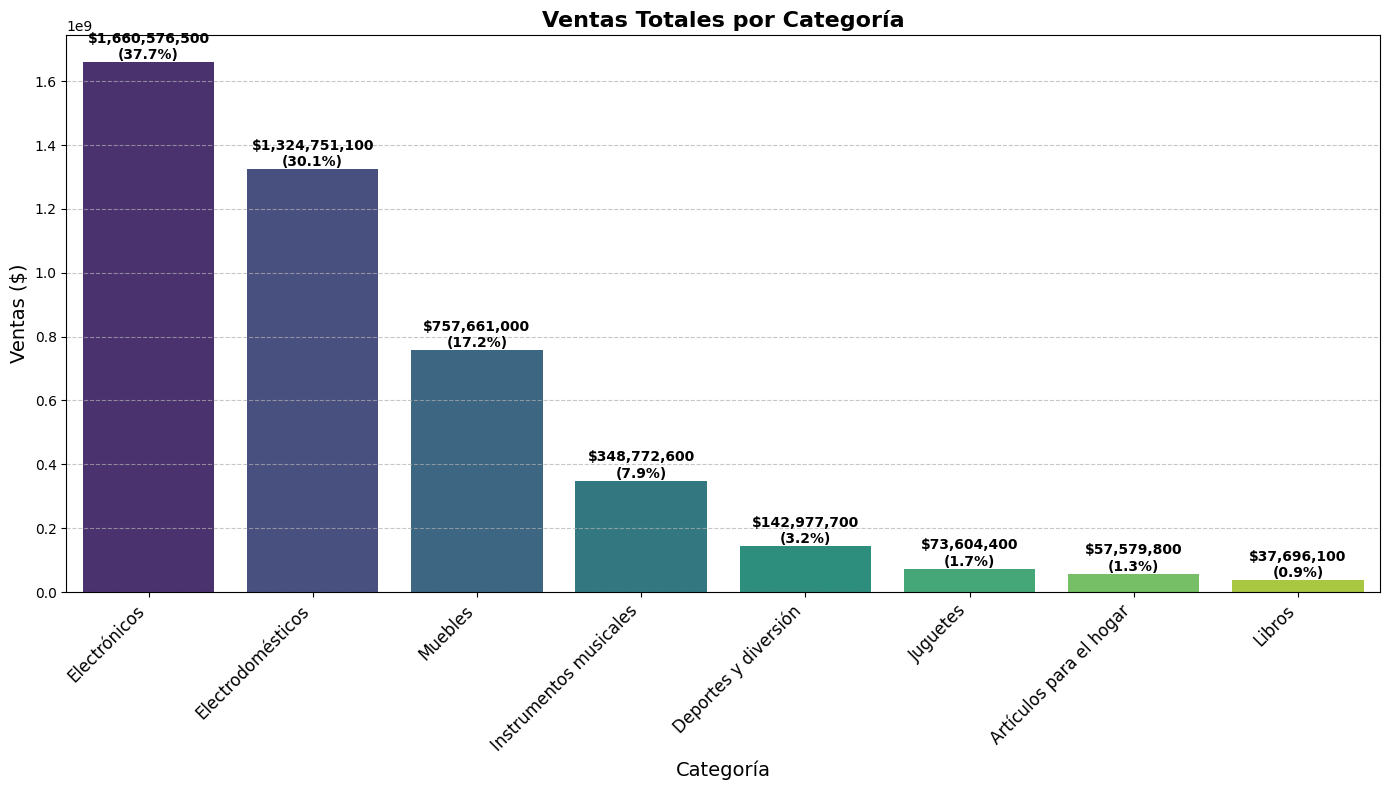

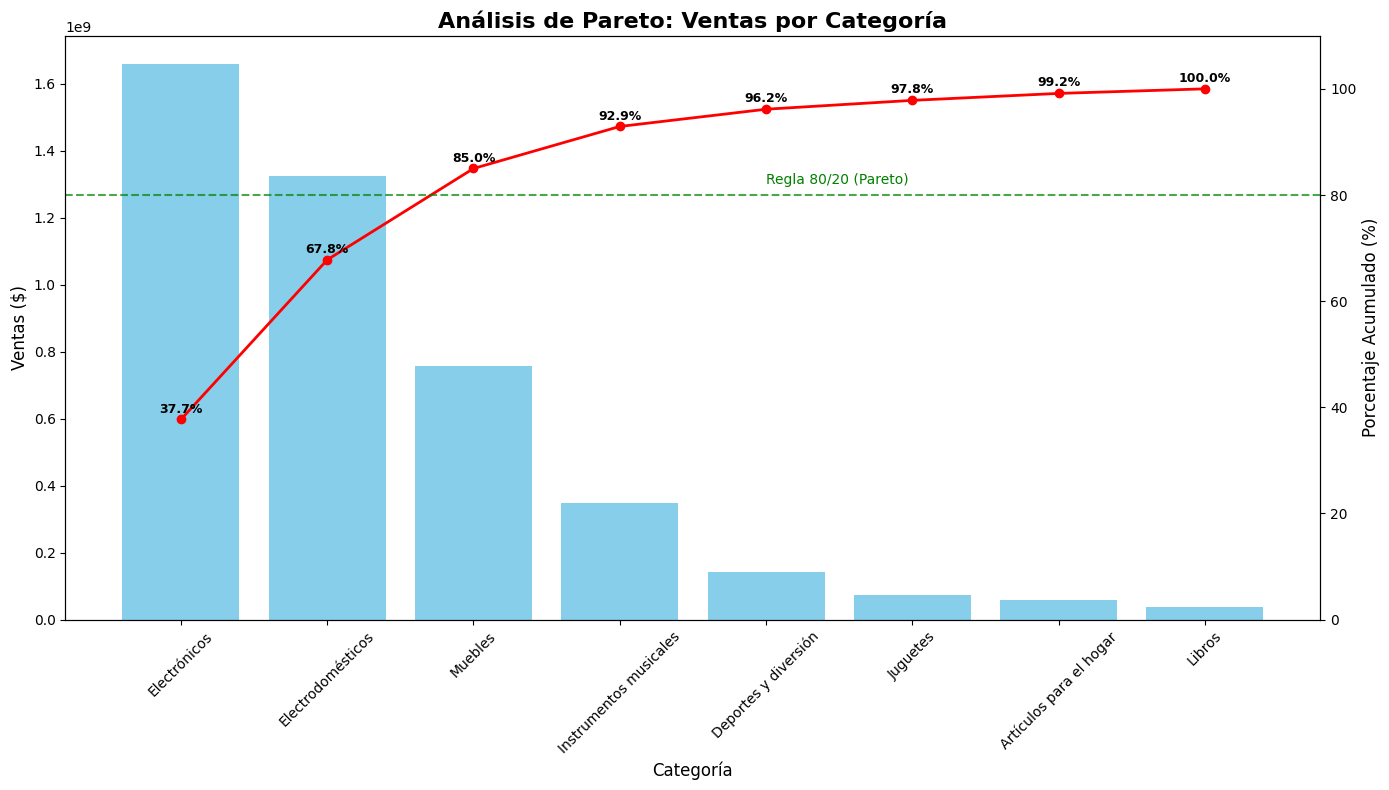


Análisis de Pareto:
El 2 de 8 categorías (25.0%) generan el 67.8% de las ventas totales.
Estas categorías son:
1. Electrónicos: $1,660,576,500.00 (37.7% del total)
2. Electrodomésticos: $1,324,751,100.00 (30.1% del total)


In [21]:
# Calcular ventas totales por categoría en todas las tiendas
ventas_categoria_total = (
    tiendas_completo.groupby("Categoría del Producto")["Precio"]
    .sum()
    .sort_values(ascending=False)
)

print("Ventas totales por categoría en todas las tiendas:")
for cat, valor in ventas_categoria_total.items():
    print(f"{cat}: ${valor:,.2f}")

# Calcular el porcentaje acumulado para análisis de Pareto
total_ventas_global = ventas_categoria_total.sum()
ventas_porcentaje = (ventas_categoria_total / total_ventas_global * 100).round(2)
ventas_acumulado = ventas_porcentaje.cumsum()

# Crear DataFrame para mejor manipulación
df_analisis = pd.DataFrame(
    {
        "Categoría": ventas_categoria_total.index,
        "Ventas": ventas_categoria_total.values,
        "Porcentaje": ventas_porcentaje.values,
        "Acumulado": ventas_acumulado.values,
    }
)

# Gráfico de barras mejorado para ventas totales
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    x="Categoría",
    y="Ventas",
    data=df_analisis,
    hue="Categoría",
    palette="viridis",
    legend=False,
)

# Añadir etiquetas de valores en las barras
for i, p in enumerate(ax.patches):
    altura = p.get_height()
    porcentaje = df_analisis["Porcentaje"][i]
    ax.annotate(
        f"${altura:,.0f}\n({porcentaje:.1f}%)",
        (p.get_x() + p.get_width() / 2.0, altura),
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="bold",
    )

# Mejorar apariencia del gráfico
plt.title("Ventas Totales por Categoría", fontsize=16, fontweight="bold")
plt.xlabel("Categoría", fontsize=14)
plt.ylabel("Ventas ($)", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Gráfico de Pareto (barras + línea acumulada)
fig, ax1 = plt.subplots(figsize=(14, 8))

# Barras para mostrar el valor de ventas
ax1.bar(df_analisis["Categoría"], df_analisis["Ventas"], color="skyblue")
ax1.set_xlabel("Categoría", fontsize=12)
ax1.set_ylabel("Ventas ($)", fontsize=12)
ax1.set_title(
    "Análisis de Pareto: Ventas por Categoría", fontsize=16, fontweight="bold"
)
ax1.tick_params(axis="x", rotation=45, labelsize=10)

# Línea para mostrar el porcentaje acumulado
ax2 = ax1.twinx()
ax2.plot(
    df_analisis["Categoría"], df_analisis["Acumulado"], "ro-", linewidth=2, markersize=6
)
ax2.set_ylabel("Porcentaje Acumulado (%)", fontsize=12)
ax2.set_ylim([0, 110])

# Añadir línea de 80% (regla de Pareto)
ax2.axhline(y=80, color="green", linestyle="--", alpha=0.7)
ax2.text(
    len(df_analisis["Categoría"]) / 2,
    82,
    "Regla 80/20 (Pareto)",
    color="green",
    fontsize=10,
)

# Añadir puntos de datos para mejor lectura
for i, (cat, acum) in enumerate(
    zip(df_analisis["Categoría"], df_analisis["Acumulado"])
):
    ax2.annotate(
        f"{acum:.1f}%",
        (i, acum),
        xytext=(0, 5),
        textcoords="offset points",
        ha="center",
        fontsize=9,
        fontweight="bold",
    )

plt.tight_layout()
plt.show()

# Análisis de la regla de Pareto (80/20)
categorias_80 = df_analisis[df_analisis["Acumulado"] <= 80]
print(f"\nAnálisis de Pareto:")
print(
    f"El {len(categorias_80)} de {len(df_analisis)} categorías ({(len(categorias_80)/len(df_analisis)*100):.1f}%) "
    + f"generan el {categorias_80['Acumulado'].max():.1f}% de las ventas totales."
)
print("Estas categorías son:")
for i, (idx, row) in enumerate(categorias_80.iterrows(), 1):
    print(
        f"{i}. {row['Categoría']}: ${row['Ventas']:,.2f} ({row['Porcentaje']:.1f}% del total)"
    )

# 3. Calificación promedio de la tienda


Estadísticas de calificaciones por tienda:
     Tienda  Calificación Promedio  Calificación Mediana  Desviación Estándar  \
0  Tienda 1                   3.98                   5.0                 1.42   
1  Tienda 2                   4.04                   5.0                 1.36   
2  Tienda 3                   4.05                   5.0                 1.39   
3  Tienda 4                   4.00                   5.0                 1.40   

   CV (%)  
0   35.68  
1   33.66  
2   34.32  
3   35.00  


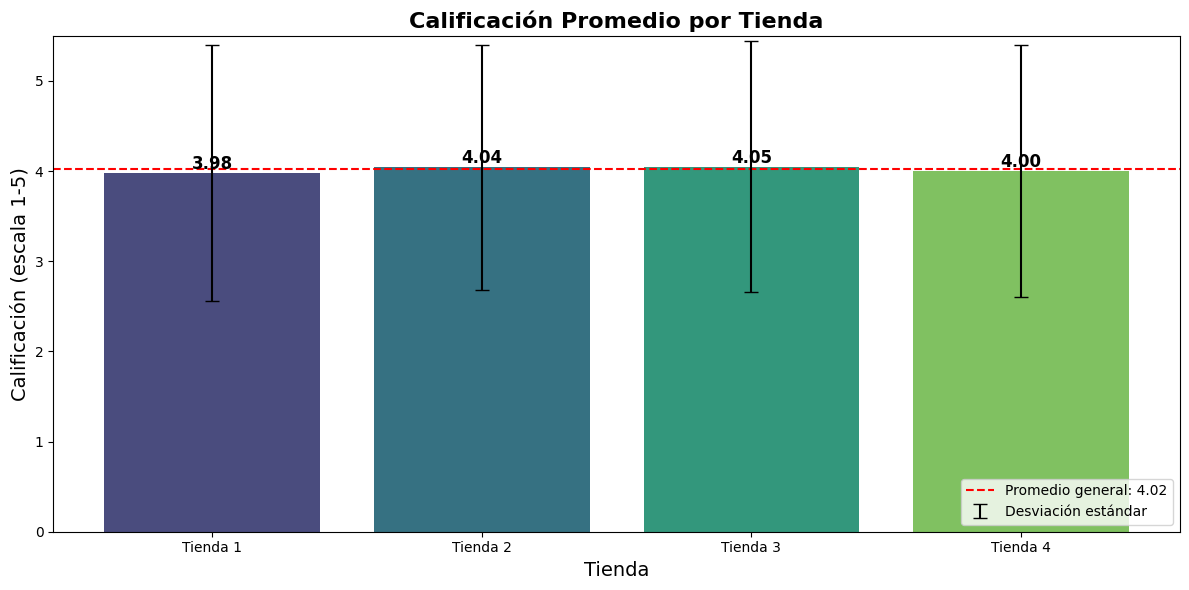


La tienda mejor calificada es Tienda 3 con 4.05 puntos.
La tienda peor calificada es Tienda 1 con 3.98 puntos.
La diferencia entre la mayor y menor facturación es de 0.07 puntos.


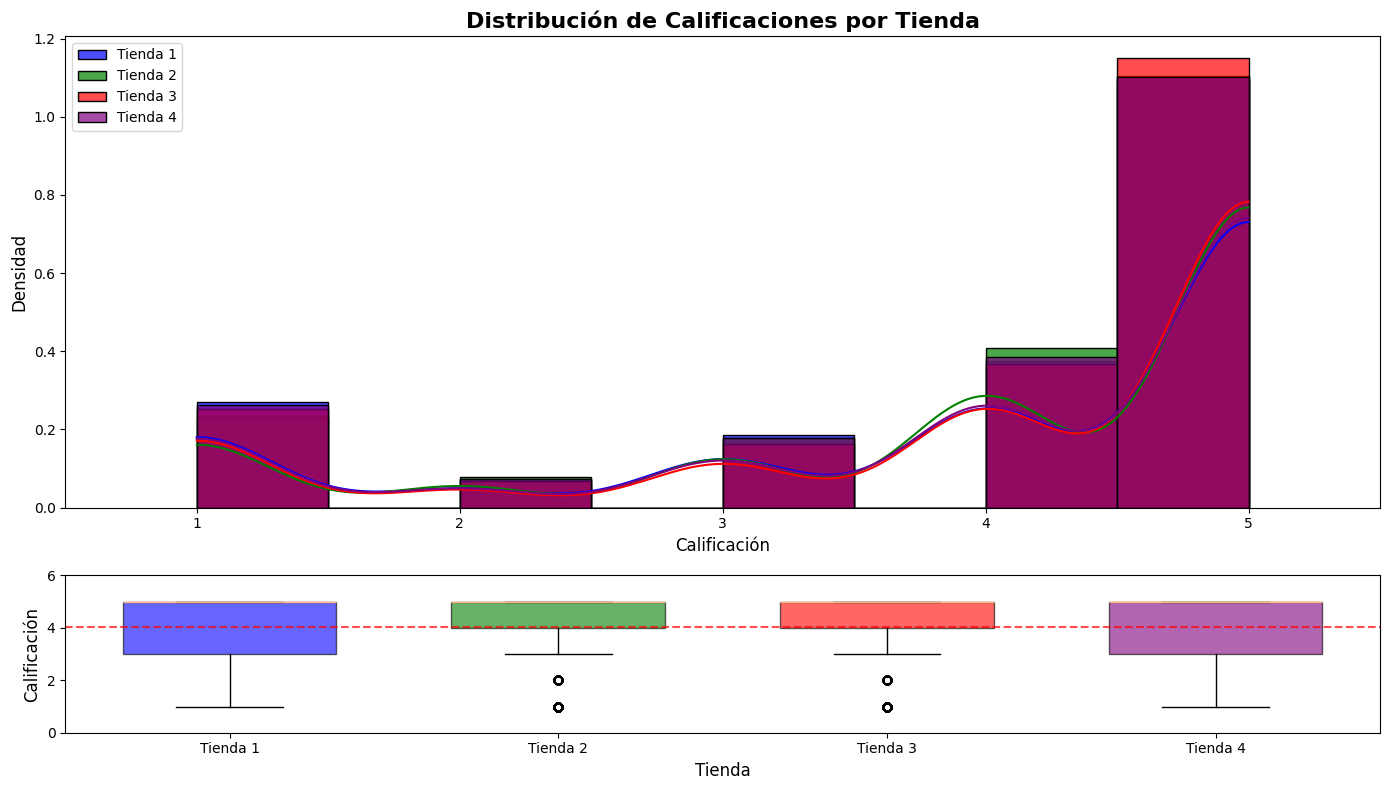


Interpretación de distribución de calificaciones:
Calificación más frecuente (moda):
- Tienda 1: 5
- Tienda 2: 5
- Tienda 3: 5
- Tienda 4: 5

La Tienda 2 muestra la mayor consistencia en sus calificaciones con un coeficiente de variación de 33.66%, lo que sugiere un servicio al cliente más estable.


In [25]:
# Análisis de calificaciones por tienda
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import pandas as pd

# Reload the original dataframes to ensure they are fresh
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Configuración de estilo para gráficos
plt.style.use("seaborn-v0_8-pastel")
sns.set_palette("pastel")

# Calcular la calificación promedio de cada tienda
calif_promedio_t1 = tienda["Calificación"].mean().round(2)
calif_promedio_t2 = tienda2["Calificación"].mean().round(2)
calif_promedio_t3 = tienda3["Calificación"].mean().round(2)
calif_promedio_t4 = tienda4["Calificación"].mean().round(2)

# Calcular medidas estadísticas adicionales
calif_median_t1 = tienda["Calificación"].median()
calif_median_t2 = tienda2["Calificación"].median()
calif_median_t3 = tienda3["Calificación"].median()
calif_median_t4 = tienda4["Calificación"].median()

calif_std_t1 = round(tienda["Calificación"].std(), 2)
calif_std_t2 = round(tienda2["Calificación"].std(), 2)
calif_std_t3 = round(tienda3["Calificación"].std(), 2)
calif_std_t4 = round(tienda4["Calificación"].std(), 2)

# Crear un dataframe para los resultados
calif_datos = pd.DataFrame(
    {
        "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
        "Calificación Promedio": [
            calif_promedio_t1,
            calif_promedio_t2,
            calif_promedio_t3,
            calif_promedio_t4,
        ],
        "Calificación Mediana": [
            calif_median_t1,
            calif_median_t2,
            calif_median_t3,
            calif_median_t4,
        ],
        "Desviación Estándar": [calif_std_t1, calif_std_t2, calif_std_t3, calif_std_t4],
        "CV (%)": [
            (calif_std_t1 / calif_promedio_t1 * 100).round(2),
            (calif_std_t2 / calif_promedio_t2 * 100).round(2),
            (calif_std_t3 / calif_promedio_t3 * 100).round(2),
            (calif_std_t4 / calif_promedio_t4 * 100).round(2),
        ],
    }
)

# Mostrar tabla de resultados
print("Estadísticas de calificaciones por tienda:")
print(calif_datos)

# Gráfico de barras para la calificación promedio
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x="Tienda",
    y="Calificación Promedio",
    data=calif_datos,
    palette="viridis",
    hue="Tienda",
    legend=False,
)

# Añadir línea horizontal para el promedio general
promedio_general = calif_datos["Calificación Promedio"].mean()
plt.axhline(
    y=promedio_general,
    color="red",
    linestyle="--",
    label=f"Promedio general: {promedio_general:.2f}",
)

# Añadir etiquetas y personalizar gráfico
plt.title("Calificación Promedio por Tienda", fontsize=16, fontweight="bold")
plt.ylabel("Calificación (escala 1-5)", fontsize=14)
plt.xlabel("Tienda", fontsize=14)
plt.ylim(0, 5.5)  # Escala completa de calificaciones

# Añadir etiquetas de valores
for i, p in enumerate(ax.patches):
    ax.annotate(
        f"{calif_datos['Calificación Promedio'][i]:.2f}",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=12,
        fontweight="bold",
    )

# Añadir desviación estándar como barras de error
plt.errorbar(
    x=range(len(calif_datos)),
    y=calif_datos["Calificación Promedio"],
    yerr=calif_datos["Desviación Estándar"],
    fmt="none",
    color="black",
    capsize=5,
    label="Desviación estándar",
)

plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Identificar tienda mejor y peor calificada
mejor_tienda = calif_datos.loc[calif_datos["Calificación Promedio"].idxmax()]["Tienda"]
peor_tienda = calif_datos.loc[calif_datos["Calificación Promedio"].idxmin()]["Tienda"]
diferencia = round(
    calif_datos["Calificación Promedio"].max()
    - calif_datos["Calificación Promedio"].min(), 2
)

print(
    f"\nLa tienda mejor calificada es {mejor_tienda} con {calif_datos['Calificación Promedio'].max():.2f} puntos."
)
print(
    f"La tienda peor calificada es {peor_tienda} con {calif_datos['Calificación Promedio'].min():.2f} puntos."
)
print(f"La diferencia entre la mayor y menor facturación es de {diferencia} puntos.")

# Gráfico de distribución de calificaciones
plt.figure(figsize=(14, 8))

# Crear subplots para histogramas y boxplots
gs = plt.GridSpec(2, 2, height_ratios=[3, 1])

# Histogramas de calificaciones
ax1 = plt.subplot(gs[0, :])
histplot_kwargs = {
    "binwidth": 0.5,
    "alpha": 0.7,
    "kde": True,
    "stat": "density",
    "common_norm": False,
    "linewidth": 1,
}

sns.histplot(
    data=tienda,
    x="Calificación",
    label="Tienda 1",
    color="blue",
    ax=ax1,
    **histplot_kwargs,
)
sns.histplot(
    data=tienda2,
    x="Calificación",
    label="Tienda 2",
    color="green",
    ax=ax1,
    **histplot_kwargs,
)
sns.histplot(
    data=tienda3,
    x="Calificación",
    label="Tienda 3",
    color="red",
    ax=ax1,
    **histplot_kwargs,
)
sns.histplot(
    data=tienda4,
    x="Calificación",
    label="Tienda 4",
    color="purple",
    ax=ax1,
    **histplot_kwargs,
)

# Ajustar límites y etiquetas
ax1.set_xlim(0.5, 5.5)
ax1.set_xlabel("Calificación", fontsize=12)
ax1.set_ylabel("Densidad", fontsize=12)
ax1.set_title(
    "Distribución de Calificaciones por Tienda", fontsize=16, fontweight="bold"
)
ax1.legend(loc="upper left")

# Boxplots de calificaciones
ax2 = plt.subplot(gs[1, :])

# Combinar datos para el boxplot
tiendas_calificaciones = [
    tienda["Calificación"],
    tienda2["Calificación"],
    tienda3["Calificación"],
    tienda4["Calificación"],
]

# Crear boxplot
box = ax2.boxplot(
    tiendas_calificaciones,
    patch_artist=True,
    tick_labels=["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    widths=0.65,
)

# Personalizar colores de boxplots
colors = ["blue", "green", "red", "purple"]
for patch, color in zip(box["boxes"], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)

ax2.set_xlabel("Tienda", fontsize=12)
ax2.set_ylabel("Calificación", fontsize=12)
ax2.set_ylim(0, 6)

# Añadir línea de promedio general
ax2.axhline(y=promedio_general, color="red", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

# Interpretación de resultados
print("\nInterpretación de distribución de calificaciones:")

# Calcular la moda de las calificaciones
moda_t1 = tienda["Calificación"].mode()[0]
moda_t2 = tienda2["Calificación"].mode()[0]
moda_t3 = tienda3["Calificación"].mode()[0]
moda_t4 = tienda4["Calificación"].mode()[0]

print(f"Calificación más frecuente (moda):")
print(f"- Tienda 1: {moda_t1}")
print(f"- Tienda 2: {moda_t2}")
print(f"- Tienda 3: {moda_t3}")
print(f"- Tienda 4: {moda_t4}")

# Análisis de variabilidad
tienda_mas_consistente = calif_datos.loc[calif_datos["CV (%)"].idxmin()]["Tienda"]
print(
    f"\nLa {tienda_mas_consistente} muestra la mayor consistencia en sus calificaciones con un coeficiente de variación de {calif_datos['CV (%)'].min():.2f}%, lo que sugiere un servicio al cliente más estable."
)

# 4. Productos más y menos vendidos

Total de productos diferentes: 51
Producto más vendido: Mesa de noche con 210 unidades
Producto menos vendido: Celular ABXY con 157 unidades
Precio promedio más alto: $2,312,778.61
Precio promedio más bajo: $15,162.78


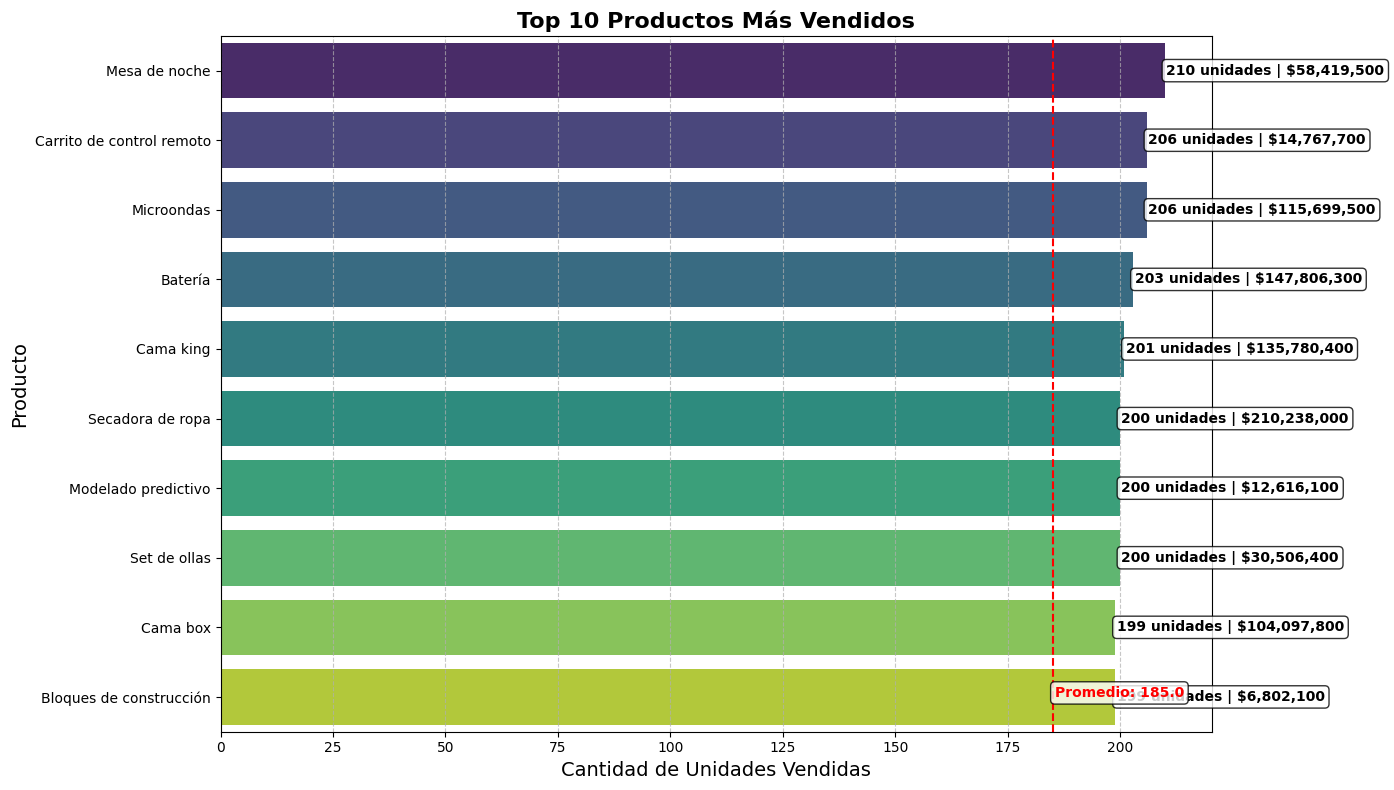

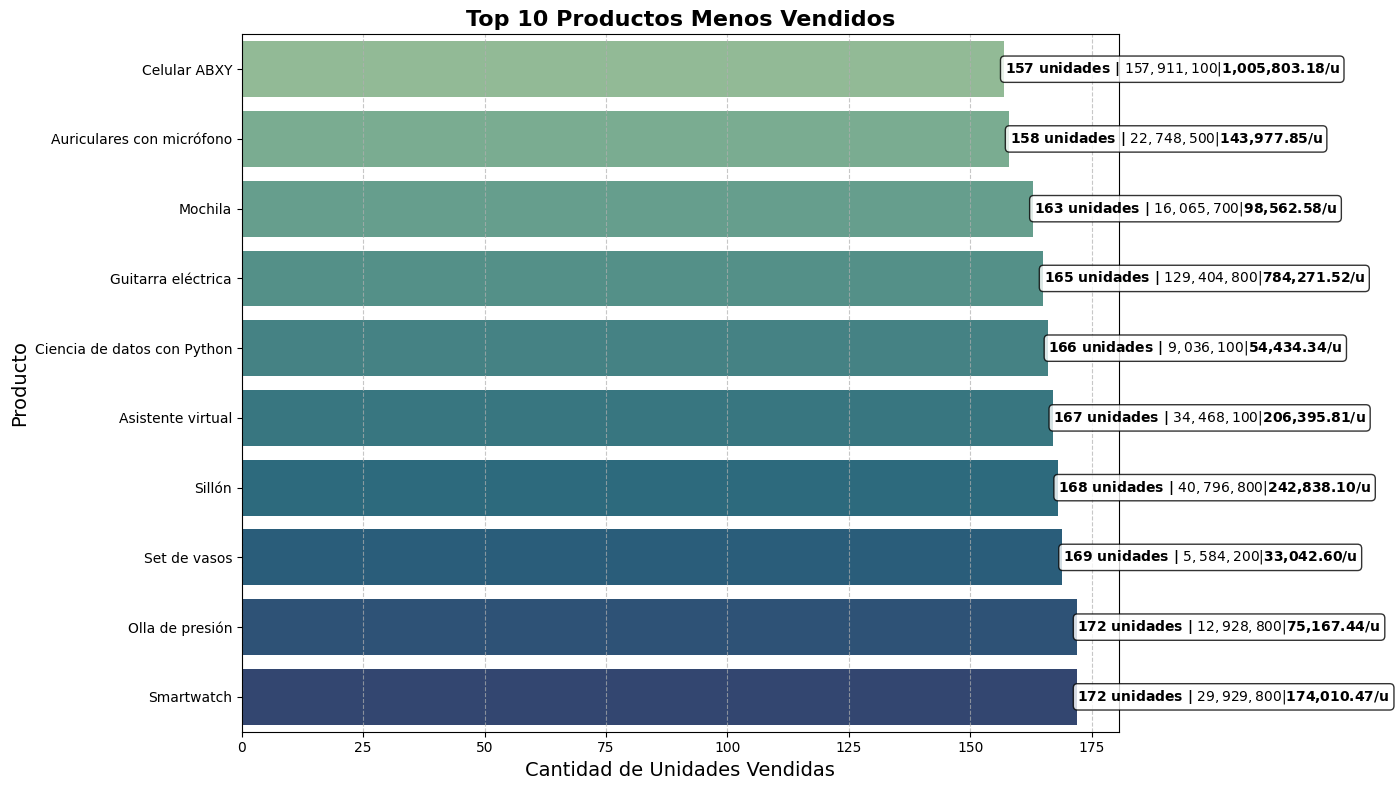

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Configuración visual para gráficos
plt.style.use("seaborn-v0_8-pastel")
sns.set_palette("pastel")

# Conteo de productos vendidos en todas las tiendas
conteo_productos = tiendas_completo["Producto"].value_counts().reset_index()
conteo_productos.columns = ["Producto", "Cantidad"]

# Calcular el valor total vendido por producto
valor_productos = tiendas_completo.groupby("Producto")["Precio"].sum().reset_index()
valor_productos.columns = ["Producto", "Valor Total"]

# Calcular el costo de envío promedio por producto
envio_productos = (
    tiendas_completo.groupby("Producto")["Costo de envío"].mean().reset_index()
)
envio_productos.columns = ["Producto", "Costo Envío Promedio"]

# Unir todos los dataframes
analisis_productos = pd.merge(conteo_productos, valor_productos, on="Producto")
analisis_productos = pd.merge(analisis_productos, envio_productos, on="Producto")

# Calcular precio promedio por producto
analisis_productos["Precio Promedio"] = (
    analisis_productos["Valor Total"] / analisis_productos["Cantidad"]
).round(2)

# Añadir categoría del producto
categorias_producto = tiendas_completo[
    ["Producto", "Categoría del Producto"]
].drop_duplicates()
analisis_productos = pd.merge(analisis_productos, categorias_producto, on="Producto")

# Ordenar por cantidad de ventas para obtener los más vendidos
mas_vendidos = analisis_productos.sort_values("Cantidad", ascending=False).head(10)
menos_vendidos = analisis_productos.sort_values("Cantidad", ascending=True).head(10)

# Estadísticas generales
print(f"Total de productos diferentes: {len(analisis_productos)}")
print(
    f"Producto más vendido: {mas_vendidos.iloc[0]['Producto']} con {mas_vendidos.iloc[0]['Cantidad']} unidades"
)
print(
    f"Producto menos vendido: {menos_vendidos.iloc[0]['Producto']} con {menos_vendidos.iloc[0]['Cantidad']} unidades"
)
print(f"Precio promedio más alto: ${analisis_productos['Precio Promedio'].max():,.2f}")
print(f"Precio promedio más bajo: ${analisis_productos['Precio Promedio'].min():,.2f}")

# Visualización de los 10 productos más vendidos
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    x="Cantidad",
    y="Producto",
    data=mas_vendidos,
    palette="viridis",
    hue="Producto",
    legend=False,
)

# Añadir etiquetas de valores
for i, p in enumerate(ax.patches):
    width = p.get_width()
    plt.text(
        width + 0.3,
        p.get_y() + p.get_height() / 2,
        f"{width:.0f} unidades | ${mas_vendidos.iloc[i]['Valor Total']:,.0f}",
        ha="left",
        va="center",
        fontsize=10,
        fontweight="bold",
        bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8),
    )

plt.title("Top 10 Productos Más Vendidos", fontsize=16, fontweight="bold")
plt.xlabel("Cantidad de Unidades Vendidas", fontsize=14)
plt.ylabel("Producto", fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Añadir línea de promedio de ventas
promedio_ventas = analisis_productos["Cantidad"].mean()
plt.axvline(x=promedio_ventas, color="red", linestyle="--")
plt.text(
    promedio_ventas + 0.5,
    9,
    f"Promedio: {promedio_ventas:.1f}",
    color="red",
    fontsize=10,
    fontweight="bold",
    bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8),
)

plt.tight_layout()
plt.show()

# Visualización de los 10 productos menos vendidos
plt.figure(figsize=(14, 8))
ax = sns.barplot(
    x="Cantidad",
    y="Producto",
    data=menos_vendidos,
    palette="crest",
    hue="Producto",
    legend=False,
)

# Añadir etiquetas de valores
for i, p in enumerate(ax.patches):
    width = p.get_width()
    plt.text(
        width + 0.1,
        p.get_y() + p.get_height() / 2,
        f"{width:.0f} unidades | ${menos_vendidos.iloc[i]['Valor Total']:,.0f} | ${menos_vendidos.iloc[i]['Precio Promedio']:,.2f}/u",
        ha="left",
        va="center",
        fontsize=10,
        fontweight="bold",
        bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8),
    )

plt.title("Top 10 Productos Menos Vendidos", fontsize=16, fontweight="bold")
plt.xlabel("Cantidad de Unidades Vendidas", fontsize=14)
plt.ylabel("Producto", fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

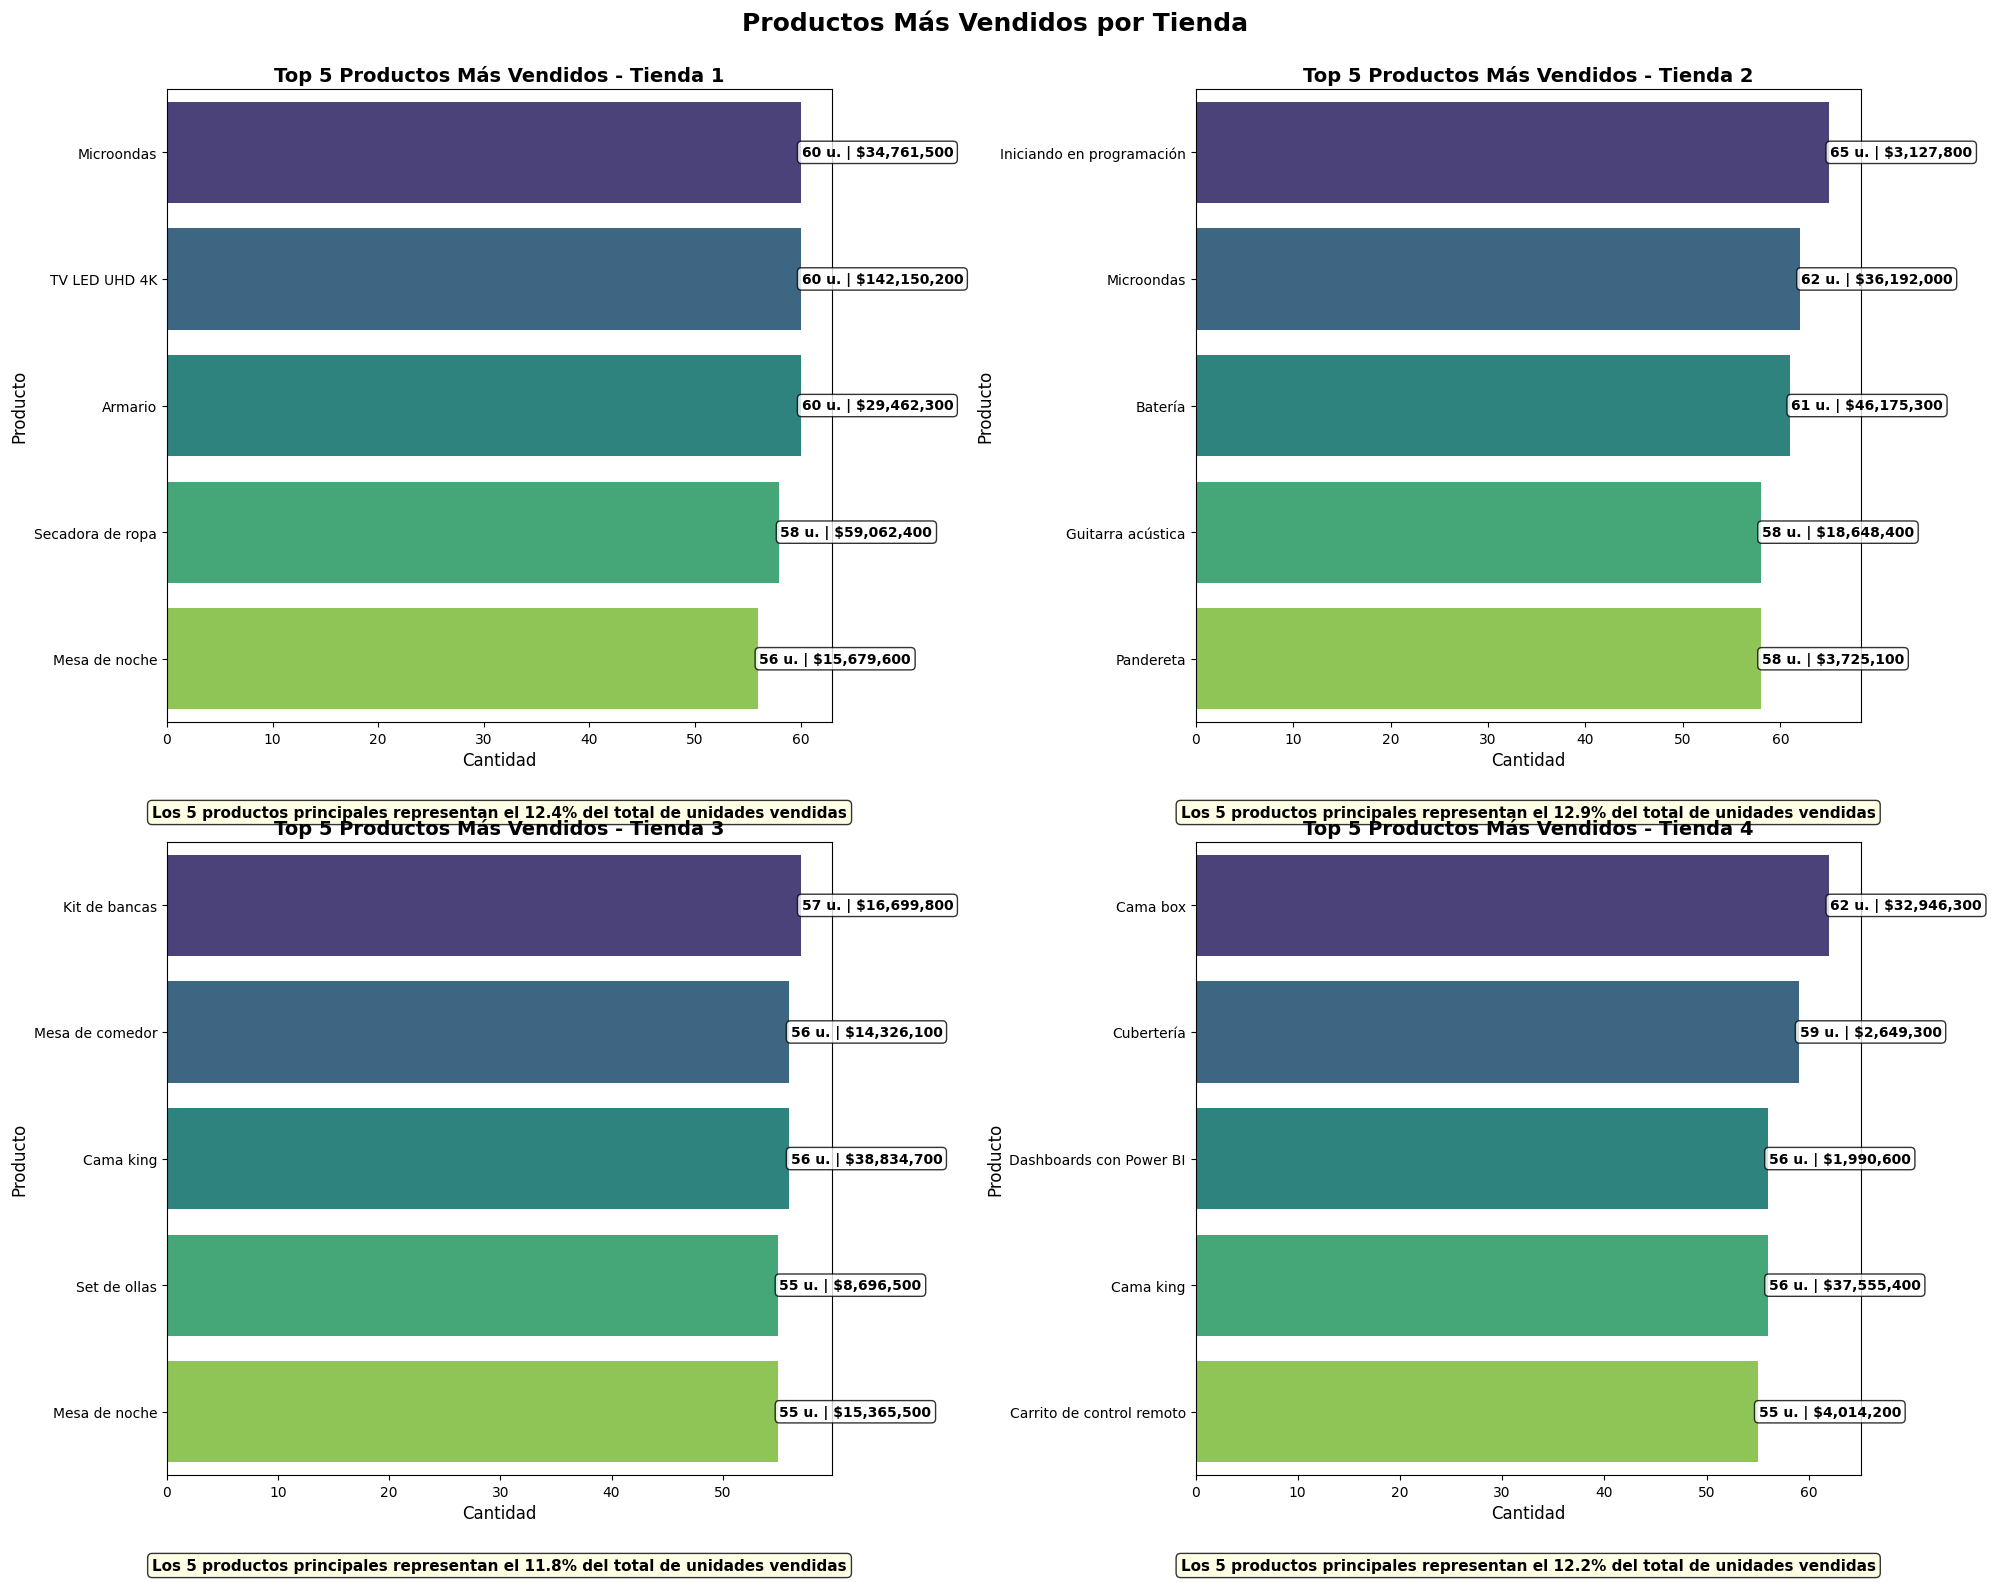


Análisis de productos más vendidos entre tiendas:
Los siguientes productos aparecen en el top 3 de más de una tienda:
- Microondas: presente en Tienda 1, Tienda 2

ANÁLISIS DE PARETO - CONCENTRACIÓN DE VENTAS:
Por valor: 16 de 51 productos (31.4%) 
generan el 78.7% del valor total de ventas.

Por cantidad: 39 de 51 productos (76.5%) 
representan el 78.7% del total de unidades vendidas.


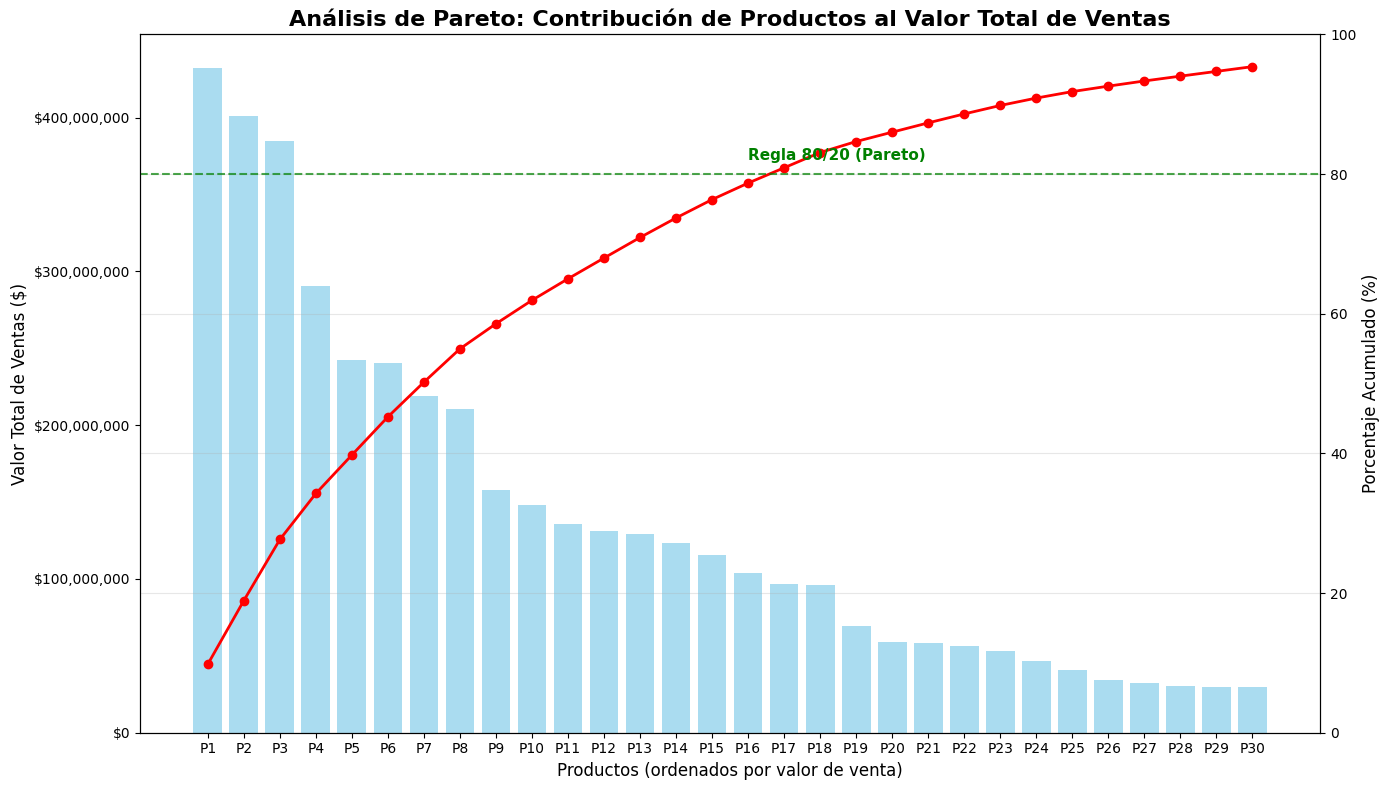


CONCLUSIONES DEL ANÁLISIS DE PRODUCTOS
1. El producto más vendido es 'Mesa de noche' con 210 unidades,
   generando $58,419,500.00 en ventas totales.
2. Análisis de Pareto: solo 16 productos
   (31.4% del catálogo) generan el 80% del valor total de ventas.
4. Aunque no es el más vendido en unidades, el producto 'TV LED UHD 4K'
   genera el mayor valor total: $432,489,600.00, representando el 9.82% del total.
8. La Tienda 2 muestra la mayor concentración de ventas en pocos productos:
   sus 5 productos principales representan el 12.9% de sus ventas totales.


In [28]:
from matplotlib.ticker import FuncFormatter

analisis_por_tienda = {}

tiendas = [tienda, tienda2, tienda3, tienda4]

for idx, tienda_df in enumerate(tiendas, 1):
    # Conteo de productos
    conteo = tienda_df["Producto"].value_counts().reset_index()
    conteo.columns = ["Producto", "Cantidad"]

    # Valor total por producto
    valor = tienda_df.groupby("Producto")["Precio"].sum().reset_index()
    valor.columns = ["Producto", "Valor Total"]

    # Unir ambos
    analisis = pd.merge(conteo, valor, on="Producto")
    analisis["Precio Promedio"] = (
        analisis["Valor Total"] / analisis["Cantidad"]
    ).round(2)

    # Calcular porcentajes y métricas acumuladas
    total_cantidad = analisis["Cantidad"].sum()
    total_valor = analisis["Valor Total"].sum()
    analisis["% del Total (Cantidad)"] = (
        analisis["Cantidad"] / total_cantidad * 100
    ).round(2)
    analisis["% del Total (Valor)"] = (
        analisis["Valor Total"] / total_valor * 100
    ).round(2)

    # Guardar en el diccionario
    analisis_por_tienda[f"Tienda {idx}"] = analisis.sort_values(
        "Cantidad", ascending=False
    )

# Crear una figura para visualizar los 5 productos más vendidos por tienda
fig, axes = plt.subplots(2, 2, figsize=(20, 16))
axes = axes.flatten()

for i, (tienda, analisis) in enumerate(analisis_por_tienda.items()):
    # Obtener los 5 más vendidos
    top5 = analisis.head(5)

    # Crear gráfico con datos de cantidad y valor
    bars = sns.barplot(
        x="Cantidad",
        y="Producto",
        hue="Producto",
        data=top5,
        palette="viridis",
        legend=False,
        ax=axes[i],
    )

    axes[i].set_title(
        f"Top 5 Productos Más Vendidos - {tienda}", fontsize=14, fontweight="bold"
    )
    axes[i].set_xlabel("Cantidad", fontsize=12)
    axes[i].set_ylabel("Producto", fontsize=12)

    # Añadir etiquetas con valor total y porcentaje
    for j, p in enumerate(axes[i].patches):
        width = p.get_width()
        info_text = f"{width:.0f} u. | ${top5.iloc[j]['Valor Total']:,.0f}"
        axes[i].text(
            width + 0.1,
            p.get_y() + p.get_height() / 2,
            info_text,
            ha="left",
            va="center",
            fontsize=10,
            fontweight="bold",
            bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.8),
        )

    # Añadir texto informativo sobre la concentración de ventas
    top5_pct = top5["% del Total (Cantidad)"].sum().round(1)
    axes[i].text(
        0.5,
        -0.15,
        f"Los 5 productos principales representan el {top5_pct}% del total de unidades vendidas",
        ha="center",
        transform=axes[i].transAxes,
        fontsize=11,
        fontweight="bold",
        bbox=dict(boxstyle="round,pad=0.3", fc="lightyellow", alpha=0.8),
    )

plt.tight_layout()
plt.subplots_adjust(top=0.93)
fig.suptitle("Productos Más Vendidos por Tienda", fontsize=18, fontweight="bold")
plt.show()

# Obtener los 3 productos más vendidos de cada tienda
top_productos = {}
for tienda, analisis in analisis_por_tienda.items():
    top_productos[tienda] = set(analisis.head(3)["Producto"])

# Encontrar productos que aparecen en el top 3 de más de una tienda
productos_recurrentes = set()
for tienda1, prods1 in top_productos.items():
    for tienda2, prods2 in top_productos.items():
        if tienda1 != tienda2:
            productos_recurrentes.update(prods1.intersection(prods2))

print(f"\nAnálisis de productos más vendidos entre tiendas:\n" + "=" * 50)
if productos_recurrentes:
    print(f"Los siguientes productos aparecen en el top 3 de más de una tienda:")
    for prod in productos_recurrentes:
        tiendas_presentes = [t for t, ps in top_productos.items() if prod in ps]
        print(f"- {prod}: presente en {', '.join(tiendas_presentes)}")
else:
    print("No hay productos que aparezcan en el top 3 de más de una tienda.")


# Análisis del impacto financiero de los productos más y menos vendidos

# Agregar columna de contribución porcentual acumulada para análisis de Pareto
analisis_productos = analisis_productos.sort_values(
    "Valor Total", ascending=False
).reset_index(drop=True)

# Asegurarse de que existan las columnas de porcentaje
if "% del Total (Valor)" not in analisis_productos.columns:
    analisis_productos["% del Total (Valor)"] = (
        analisis_productos["Valor Total"]
        / analisis_productos["Valor Total"].sum()
        * 100
    ).round(2)
if "% del Total (Cantidad)" not in analisis_productos.columns:
    analisis_productos["% del Total (Cantidad)"] = (
        analisis_productos["Cantidad"] / analisis_productos["Cantidad"].sum() * 100
    ).round(2)

analisis_productos["% Acumulado (Valor)"] = analisis_productos[
    "% del Total (Valor)"
].cumsum()
analisis_productos["% Acumulado (Cantidad)"] = (
    analisis_productos["% del Total (Cantidad)"].sort_values(ascending=False).cumsum()
)

# Identificar cuántos productos representan el 80% de las ventas (regla de Pareto)
productos_80_valor = analisis_productos[analisis_productos["% Acumulado (Valor)"] <= 80]
productos_80_cantidad = analisis_productos[
    analisis_productos["% Acumulado (Cantidad)"] <= 80
]

print(f"\nANÁLISIS DE PARETO - CONCENTRACIÓN DE VENTAS:\n" + "=" * 50)
print(
    f"Por valor: {len(productos_80_valor)} de {len(analisis_productos)} productos ({(len(productos_80_valor)/len(analisis_productos)*100):.1f}%) "
)
print(
    f"generan el {productos_80_valor['% del Total (Valor)'].sum():.1f}% del valor total de ventas."
)

print(
    f"\nPor cantidad: {len(productos_80_cantidad)} de {len(analisis_productos)} productos ({(len(productos_80_cantidad)/len(analisis_productos)*100):.1f}%) "
)
print(
    f"representan el {productos_80_cantidad['% del Total (Cantidad)'].sum():.1f}% del total de unidades vendidas."
)

# Visualización de la curva de Pareto para valor de ventas
plt.figure(figsize=(14, 8))

# Crear gráfico de barras para el valor de ventas por producto (top 30)
top30 = analisis_productos.head(30)
x = range(len(top30))
y1 = top30["Valor Total"]

ax1 = plt.subplot()
ax1.bar(x, y1, color="skyblue", alpha=0.7)
ax1.set_ylabel("Valor Total de Ventas ($)", fontsize=12)
ax1.set_xlabel("Productos (ordenados por valor de venta)", fontsize=12)

# Formato de moneda para el eje y
fmt = lambda x, pos: f"${x:,.0f}"
ax1.yaxis.set_major_formatter(FuncFormatter(fmt))

# Crear línea para el porcentaje acumulado
ax2 = ax1.twinx()
y2 = top30["% Acumulado (Valor)"]
ax2.plot(x, y2, "ro-", linewidth=2, markersize=6)
ax2.set_ylabel("Porcentaje Acumulado (%)", fontsize=12)
ax2.set_ylim([0, 100])

# Añadir línea de 80% (regla de Pareto)
ax2.axhline(y=80, color="green", linestyle="--", alpha=0.7)
ax2.text(
    len(x) / 2,
    82,
    "Regla 80/20 (Pareto)",
    color="green",
    fontsize=11,
    fontweight="bold",
)

# Añadir títulos y etiquetas
plt.title(
    "Análisis de Pareto: Contribución de Productos al Valor Total de Ventas",
    fontsize=16,
    fontweight="bold",
)
plt.xticks(x, [f"P{i+1}" for i in x], rotation=90)
plt.grid(axis="y", alpha=0.3)

# Añadir etiquetas para los primeros productos
for i in range(min(5, len(top30))):
    plt.annotate(
        f"{top30.iloc[i]['Producto'][:15]}{'...' if len(top30.iloc[i]['Producto']) > 15 else ''}",
        xy=(i, top30.iloc[i]["Valor Total"]),
        xytext=(0, 10),
        textcoords="offset points",
        ha="center",
        fontsize=9,
        rotation=45,
        bbox=dict(boxstyle="round,pad=0.3", fc="yellow", alpha=0.3),
    )

plt.tight_layout()
plt.show()

# Conclusiones sobre el análisis de productos
print("\nCONCLUSIONES DEL ANÁLISIS DE PRODUCTOS\n" + "=" * 50)

# Productos más vendidos
top_producto = mas_vendidos.iloc[0]
print(
    f"1. El producto más vendido es '{top_producto['Producto']}' con {top_producto['Cantidad']} unidades,"
)
print(f"   generando ${top_producto['Valor Total']:,.2f} en ventas totales.")

# Concentración de ventas
print(f"2. Análisis de Pareto: solo {len(productos_80_valor)} productos")
print(
    f"   ({(len(productos_80_valor)/len(analisis_productos)*100):.1f}% del catálogo) generan el 80% del valor total de ventas."
)


# Productos de alto valor
top_valor = analisis_productos.nlargest(1, "Valor Total").iloc[0]
if top_valor["Producto"] != top_producto["Producto"]:
    print(
        f"4. Aunque no es el más vendido en unidades, el producto '{top_valor['Producto']}'"
    )
    print(
        f"   genera el mayor valor total: ${top_valor['Valor Total']:,.2f}, representando el {top_valor['% del Total (Valor)']:.2f}% del total."
    )

# Concentración por tienda
top5_concentracion = [
    analisis_por_tienda[f"Tienda {i}"].head(5)["% del Total (Cantidad)"].sum().round(1)
    for i in range(1, 5)
]
tienda_mayor_concentracion = np.argmax(top5_concentracion) + 1
print(
    f"8. La Tienda {tienda_mayor_concentracion} muestra la mayor concentración de ventas en pocos productos:"
)
print(
    f"   sus 5 productos principales representan el {max(top5_concentracion)}% de sus ventas totales."
)

# 5. Envío promedio por tienda

ESTADÍSTICAS DE COSTOS DE ENVÍO POR TIENDA
     Tienda Envío Promedio Envío Mediana Desviación Estándar Mínimo  \
0  Tienda 1      $26018.61     $12400.00           $32860.00  $0.00   
1  Tienda 2      $25216.24     $11600.00           $31741.38  $0.00   
2  Tienda 3      $24805.68     $11900.00           $30945.89  $0.00   
3  Tienda 4      $23459.46     $10950.00           $30279.10  $0.00   

       Máximo Coef. Variación (%)  
0  $160800.00             126.29%  
1  $162500.00             125.88%  
2  $158400.00             124.75%  
3  $154700.00             129.07%  


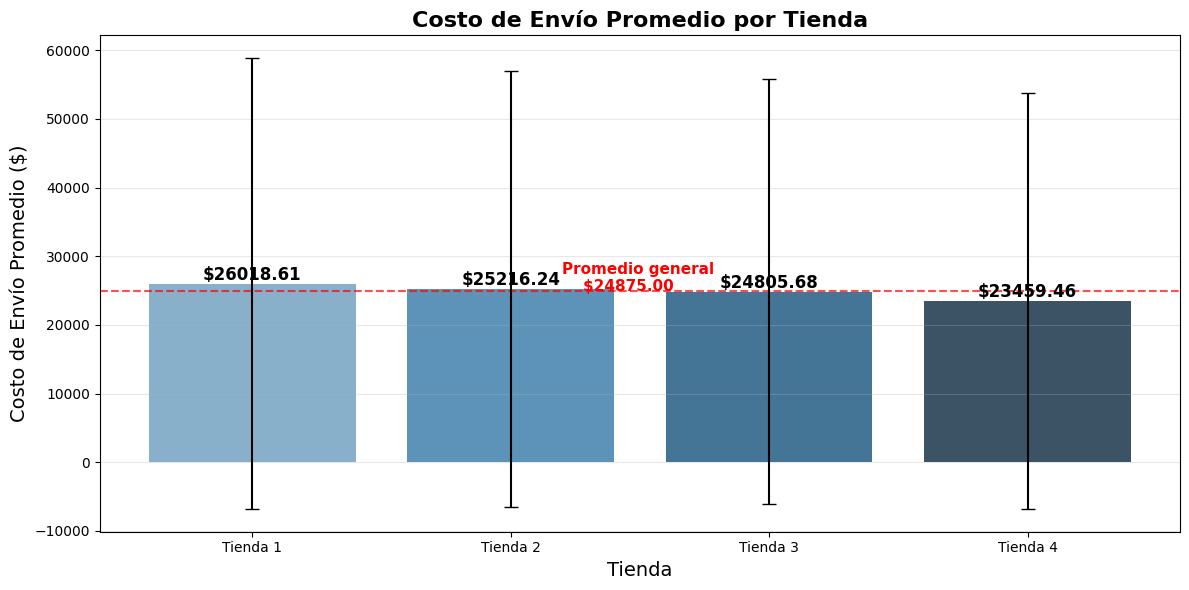

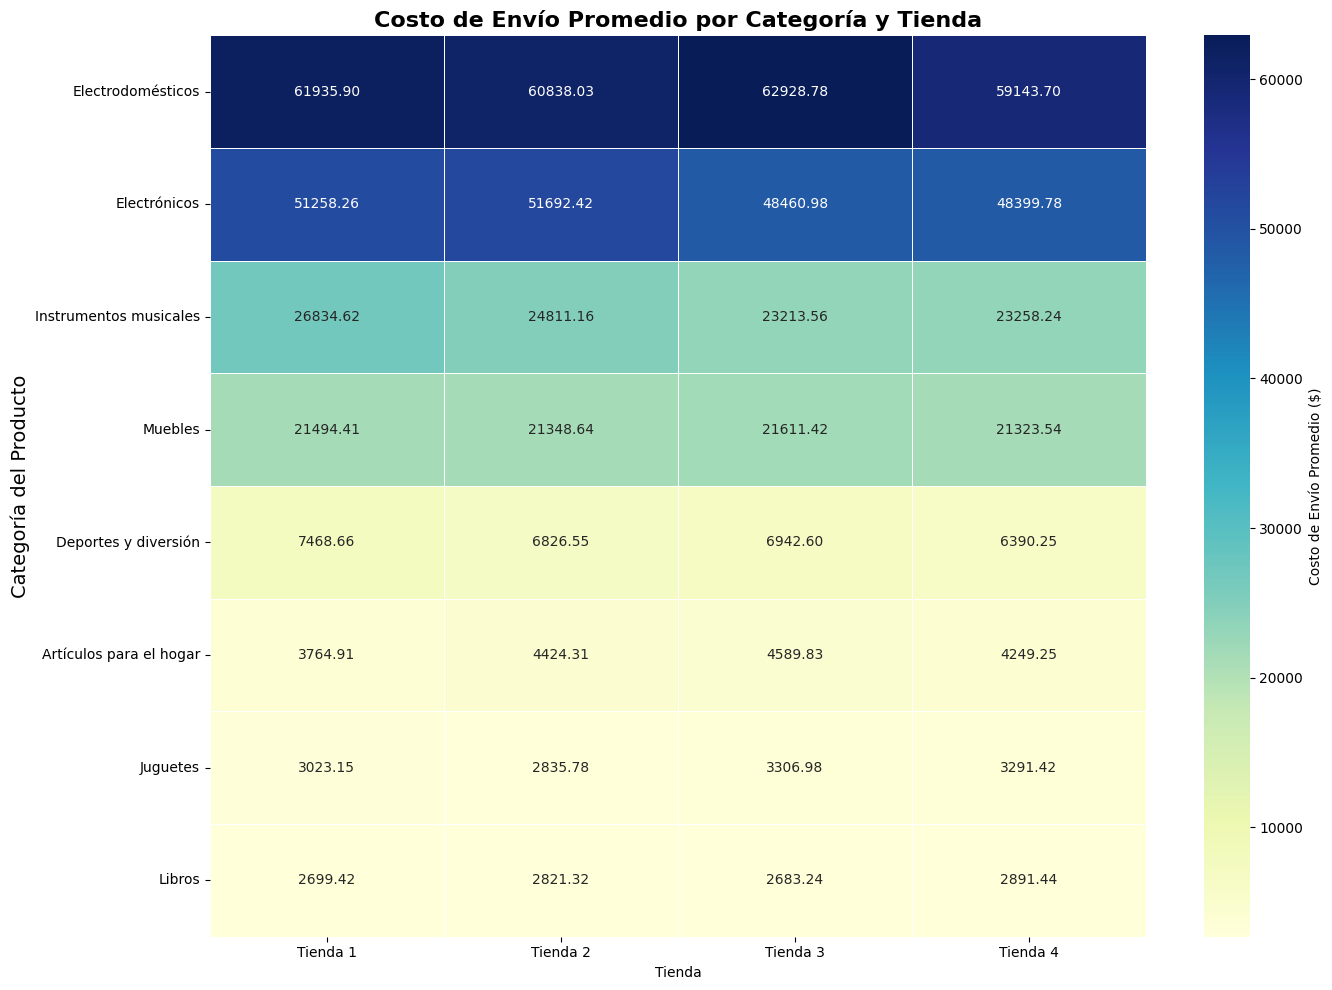

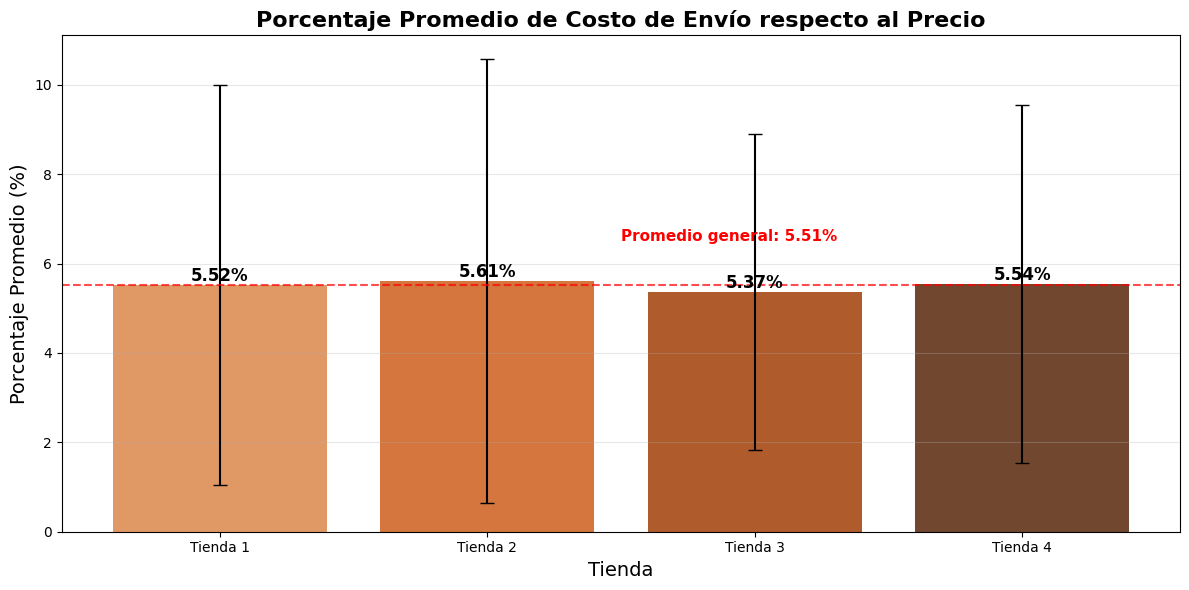

In [31]:
# Análisis de costos de envío por tienda
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Reload the original dataframes to ensure they are fresh
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

# Configuración visual para gráficos
plt.style.use("seaborn-v0_8-pastel")
sns.set_palette("pastel")

# Calcular el costo de envío promedio para cada tienda
envio_promedio_t1 = tienda["Costo de envío"].mean()
envio_promedio_t2 = tienda2["Costo de envío"].mean()
envio_promedio_t3 = tienda3["Costo de envío"].mean()
envio_promedio_t4 = tienda4["Costo de envío"].mean()

# Calcular estadísticas adicionales para análisis más profundo
envio_mediana_t1 = tienda["Costo de envío"].median()
envio_mediana_t2 = tienda2["Costo de envío"].median()
envio_mediana_t3 = tienda3["Costo de envío"].median()
envio_mediana_t4 = tienda4["Costo de envío"].median()

envio_std_t1 = tienda["Costo de envío"].std()
envio_std_t2 = tienda2["Costo de envío"].std()
envio_std_t3 = tienda3["Costo de envío"].std()
envio_std_t4 = tienda4["Costo de envío"].std()

envio_min_t1 = tienda["Costo de envío"].min()
envio_min_t2 = tienda2["Costo de envío"].min()
envio_min_t3 = tienda3["Costo de envío"].min()
envio_min_t4 = tienda4["Costo de envío"].min()

envio_max_t1 = tienda["Costo de envío"].max()
envio_max_t2 = tienda2["Costo de envío"].max()
envio_max_t3 = tienda3["Costo de envío"].max()
envio_max_t4 = tienda4["Costo de envío"].max()

# Crear un DataFrame para mostrar todas las estadísticas
estadisticas_envio = pd.DataFrame(
    {
        "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
        "Envío Promedio": [
            envio_promedio_t1,
            envio_promedio_t2,
            envio_promedio_t3,
            envio_promedio_t4,
        ],
        "Envío Mediana": [
            envio_mediana_t1,
            envio_mediana_t2,
            envio_mediana_t3,
            envio_mediana_t4,
        ],
        "Desviación Estándar": [envio_std_t1, envio_std_t2, envio_std_t3, envio_std_t4],
        "Mínimo": [envio_min_t1, envio_min_t2, envio_min_t3, envio_min_t4],
        "Máximo": [envio_max_t1, envio_max_t2, envio_max_t3, envio_max_t4],
        "Coef. Variación (%)": [
            (envio_std_t1 / envio_promedio_t1 * 100).round(2),
            (envio_std_t2 / envio_promedio_t2 * 100).round(2),
            (envio_std_t3 / envio_promedio_t3 * 100).round(2),
            (envio_std_t4 / envio_promedio_t4 * 100).round(2),
        ],
    }
)

# Formatear los valores para mejor visualización
estadisticas_envio_formato = estadisticas_envio.copy()
for col in [
    "Envío Promedio",
    "Envío Mediana",
    "Desviación Estándar",
    "Mínimo",
    "Máximo",
]:
    estadisticas_envio_formato[col] = estadisticas_envio_formato[col].apply(
        lambda x: f"${x:.2f}"
    )

estadisticas_envio_formato["Coef. Variación (%)"] = estadisticas_envio_formato[
    "Coef. Variación (%)"
].apply(lambda x: f"{x}%")

# Mostrar la tabla de estadísticas
print("ESTADÍSTICAS DE COSTOS DE ENVÍO POR TIENDA")
print("=" * 50)
print(estadisticas_envio_formato)

# 1. Gráfico de barras comparativo para envío promedio
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x="Tienda",
    y="Envío Promedio",
    hue="Tienda",
    data=estadisticas_envio,
    palette="Blues_d",
    legend=False,
)

# Añadir etiquetas de valores
for i, p in enumerate(ax.patches):
    ax.annotate(
        f"${estadisticas_envio['Envío Promedio'][i]:.2f}",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=12,
        fontweight="bold",
    )

# Añadir línea para el promedio general
promedio_general = estadisticas_envio["Envío Promedio"].mean()
plt.axhline(y=promedio_general, color="red", linestyle="--", alpha=0.7)
plt.text(
    1.2,
    promedio_general + 0.5,
    f"Promedio general\n    ${promedio_general:.2f}",
    color="red",
    fontsize=11,
    fontweight="bold",
)

# Mejoras estéticas
plt.title("Costo de Envío Promedio por Tienda", fontsize=16, fontweight="bold")
plt.xlabel("Tienda", fontsize=14)
plt.ylabel("Costo de Envío Promedio ($)", fontsize=14)
plt.grid(axis="y", alpha=0.3)

# Añadir barras de error que muestren la desviación estándar
plt.errorbar(
    x=range(len(estadisticas_envio)),
    y=estadisticas_envio["Envío Promedio"],
    yerr=estadisticas_envio["Desviación Estándar"],
    fmt="none",
    color="black",
    capsize=5,
)

plt.tight_layout()
plt.show()

# 2. Análisis por categoría de producto

tiendas_df = pd.concat(
    [tienda, tienda2, tienda3, tienda4],
    keys=["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
)
tiendas_df = tiendas_df.reset_index()
tiendas_df = tiendas_df.rename(columns={"level_0": "Tienda", "level_1": "ID_registro"})
tiendas_df = tiendas_df.drop("ID_registro", axis=1)

tiendas_df = tiendas_df.loc[:, ~tiendas_df.columns.duplicated()]

# Calcular el costo de envío promedio por categoría y tienda
envio_categoria = (
    tiendas_df.groupby(["Tienda", "Categoría del Producto"])["Costo de envío"]
    .mean()
    .reset_index()
)

# Pivot para crear tabla de tiendas x categorías
envio_pivot = envio_categoria.pivot(
    index="Categoría del Producto", columns="Tienda", values="Costo de envío"
)

# Calcular el envío promedio total por categoría y ordenar
envio_pivot["Promedio"] = envio_pivot.mean(axis=1)
envio_pivot = envio_pivot.sort_values("Promedio", ascending=False)

# Crear heatmap para visualizar
plt.figure(figsize=(14, 10))
ax = sns.heatmap(
    envio_pivot.drop("Promedio", axis=1),
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    linewidths=0.5,
    cbar_kws={"label": "Costo de Envío Promedio ($)"},
)

plt.title(
    "Costo de Envío Promedio por Categoría y Tienda", fontsize=16, fontweight="bold"
)
plt.ylabel("Categoría del Producto", fontsize=14)
plt.tight_layout()
plt.show()

# 3. Análisis del costo de envío como porcentaje del precio
tiendas_df["Porcentaje Envío/Precio"] = (
    tiendas_df["Costo de envío"] / tiendas_df["Precio"] * 100
).round(2)

# Calcular porcentajes promedio por tienda
porcentaje_por_tienda = (
    tiendas_df.groupby("Tienda")["Porcentaje Envío/Precio"]
    .agg(["mean", "median", "std", "min", "max"])
    .reset_index()
)
porcentaje_por_tienda.columns = [
    "Tienda",
    "Media",
    "Mediana",
    "Desv. Estándar",
    "Mínimo",
    "Máximo",
]

# Crear gráfico de barras para porcentaje promedio
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x="Tienda",
    y="Media",
    hue="Tienda",
    data=porcentaje_por_tienda,
    palette="Oranges_d",
    legend=False,
)

# Añadir etiquetas de valores
for i, p in enumerate(ax.patches):
    ax.annotate(
        f"{porcentaje_por_tienda['Media'][i]:.2f}%",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=12,
        fontweight="bold",
    )

# Añadir barras de error
plt.errorbar(
    x=range(len(porcentaje_por_tienda)),
    y=porcentaje_por_tienda["Media"],
    yerr=porcentaje_por_tienda["Desv. Estándar"],
    fmt="none",
    color="black",
    capsize=5,
)

# Añadir línea promedio general
promedio_general_pct = porcentaje_por_tienda["Media"].mean()
plt.axhline(y=promedio_general_pct, color="red", linestyle="--", alpha=0.7)
plt.text(
    1.5,
    promedio_general_pct + 1,
    f"Promedio general: {promedio_general_pct:.2f}%",
    color="red",
    fontsize=11,
    fontweight="bold",
)

plt.title(
    "Porcentaje Promedio de Costo de Envío respecto al Precio",
    fontsize=16,
    fontweight="bold",
)
plt.xlabel("Tienda", fontsize=14)
plt.ylabel("Porcentaje Promedio (%)", fontsize=14)
plt.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()